# **Hotel Booking Case Study**

## About the Dataset

The dataset has been provided by 'INN Hotels'. It contains various features related to hotel bookings. The primary objective is to analyze the data to understand booking patterns, uncover insights, identify factors influencing cancellations, and predict future booking cancellations.

The dataset consists of the following variables:
1. `Booking_ID`: unique identifier of each booking
2. `no_of_adults`: Number of adults
3. `no_of_children`: Number of Children
4. `no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. `no_of_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. `type_of_meal_plan`: Type of meal plan booked by the customer
7. `required_car_parking_space`: Does the customer require a car parking space? (0 - No, 1 - Yes)
8. `room_type_reserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
9. `lead_time`: Number of days between the date of booking and the arrival date
10. `arrival_year`: Year of arrival date
11. `arrival_month`: Month of arrival date
12. `arrival_date`: Date of the month
13. `market_segment_type`: Market segment designation
14. `repeated_guest`: Is the customer a repeated guest? (0 - No, 1 - Yes)
15. `no_of_previous_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking
16. `no_of_previous_bookings_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking
17. `avg_price_per_room`: Average price per day of the reservation; prices of the rooms are dynamic (in euros)
18. `no_of_special_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc.)
19. `booking_status`: Flag indicating if the booking was canceled or not

### Import libraries

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [4]:
# setting options to display max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load the Dataset

In [5]:
# load the dataset
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


---
## Basic Information

In [4]:
df.shape

(36275, 19)

There are **36275** rows and **19** columns in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* There are **36275** entries in the dataset.
* There are **19** columns in the dataset.
* There are 14 numerical variables (13 integers and 1 float).
* There are 5 categorical variables (object datatypes).
* There are NO missing values in the dataset. 

---
## Exploratory Data Analysis (EDA)

### Descriptive Statistics (Numerical columns)

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Descriptive statistics of numerical columns show that there are significant outliers in the following columns:
* **lead_time** - max: 443 days
* **avg_price_per_room** - max: 540 euros

### Descriptive Statistics (Categorical columns)

In [7]:
df.describe(include='object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


Descriptive statistics of categorical columns provide the following information:
* Each booking ID is unique, as indicated by the equal count and number of unique values.
* There are four types of meal plans in the dataset, with "**Meal Plan 1**" being the most common, chosen in 27,835 of the bookings.
* There are seven types of rooms available for reservation, with "**Room_Type 1**" being the most frequently reserved room type, accounting for 28,130 bookings.
* The dataset contains five market segment types, with "**Online**" being the predominant segment, representing 23,214 bookings.
* There are two types of booking status, with '**Not_Canceled**' being the most frequent value occurring 24,390 times. This indicates a class imbalance in the target variable.    

### Checking for Class Imbalance

In [8]:
# Calculate percentages of canceled and not canceled bookings.
df['booking_status'].value_counts() / 36275 * 100

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: count, dtype: float64

Booking status is the target variable which needs to be predicted. The above value counts for booking status indicate a class imbalance.
  - Canceled bookings only account for 32.76% of the dataset whereas bookings not canceled account for 67.24% of the dataset.
  
The predictions might be biased towards not canceled due to this class imbalance in the dataset.  

### Exploring categorical columns

In [9]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [10]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [11]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

### Duplicate Values

In [12]:
# Check for duplicated rows
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

There are NO duplicate rows in the dataset. This indicates that each row represents a unique booking record. 

### Missing Values

In [13]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Booking_ID                              0
arrival_month                           0
no_of_special_requests                  0
avg_price_per_room                      0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
repeated_guest                          0
market_segment_type                     0
arrival_date                            0
arrival_year                            0
no_of_adults                            0
lead_time                               0
room_type_reserved                      0
required_car_parking_space              0
type_of_meal_plan                       0
no_of_week_nights                       0
no_of_weekend_nights                    0
no_of_children                          0
booking_status                          0
dtype: int64

There are NO missing values in the dataset.

### Inconsistencies

In [14]:
# Check for any obvious inconsistencies in the data (e.g., negative values in columns that should only have positives)
inconsistencies = {
    'no_of_adults': (df['no_of_adults'] < 0).sum(),
    'no_of_children': (df['no_of_children'] < 0).sum(),
    'no_of_weekend_nights': (df['no_of_weekend_nights'] < 0).sum(),
    'no_of_week_nights': (df['no_of_week_nights'] < 0).sum(),
    'required_car_parking_space': (df['required_car_parking_space'] < 0).sum(),
    'lead_time': (df['lead_time'] < 0).sum(),
    'no_of_previous_cancellations': (df['no_of_previous_cancellations'] < 0).sum(),
    'no_of_previous_bookings_not_canceled': (df['no_of_previous_bookings_not_canceled'] < 0).sum(),
    'avg_price_per_room': (df['avg_price_per_room'] < 0).sum(),
    'no_of_special_requests': (df['no_of_special_requests'] < 0).sum(),
    'repeated_guest': (df['repeated_guest'] < 0).sum()
}

inconsistencies

{'no_of_adults': 0,
 'no_of_children': 0,
 'no_of_weekend_nights': 0,
 'no_of_week_nights': 0,
 'required_car_parking_space': 0,
 'lead_time': 0,
 'no_of_previous_cancellations': 0,
 'no_of_previous_bookings_not_canceled': 0,
 'avg_price_per_room': 0,
 'no_of_special_requests': 0,
 'repeated_guest': 0}

 There are NO obvious inconsistencies in the data, such as negative values in columns where only positive values would make sense. 

### Outliers

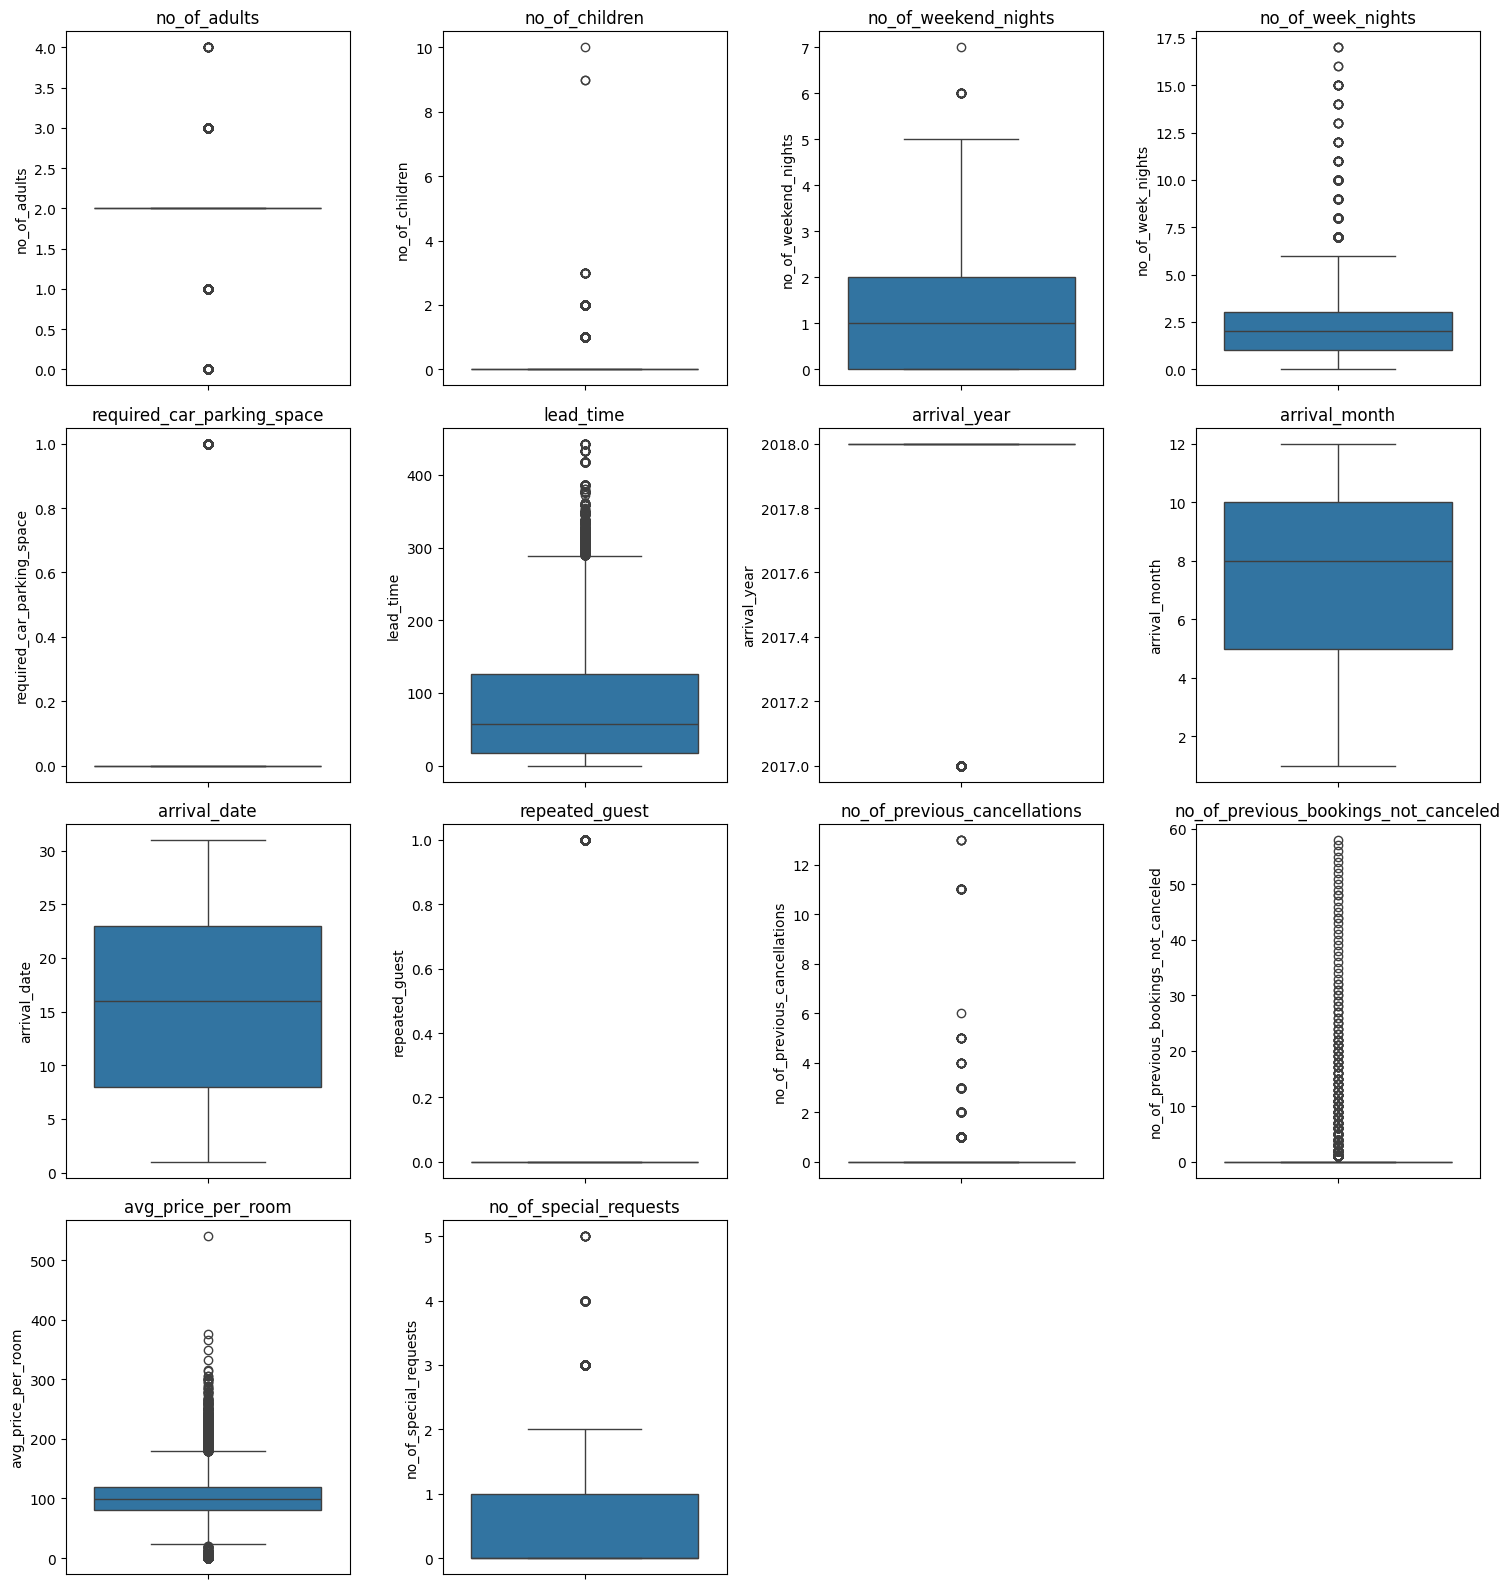

In [15]:
# Create box plots for all  numeric columns
numeric_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights',
                   'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month',
                   'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                   'avg_price_per_room', 'no_of_special_requests']

# Adjusting the subplot grid size to accommodate all numeric columns
num_cols = len(numeric_columns)
num_rows = (num_cols // 4) + (1 if num_cols % 4 else 0)  # Adjust the number of rows in the grid

plt.figure(figsize=(15, num_rows * 4))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

The boxplots reveal some key insights:

1. '**no_of_adults**', '**no_of_children**', '**no_of_weekend_nights**', '**no_of_week_nights**', '**required_car_parking_space**', '**no_of_previous_cancellations**', '**no_of_previous_bookings_not_canceled**', '**no_of_special_requests**': These columns have relatively small ranges and a few outliers.

2. '**lead_time**', '**avg_price_per_room**': These columns show a wider range and a significant number of outliers, indicating a high variability in the data.

3. '**arrival_year**', '**arrival_month**', '**arrival_date**': These columns represent date-related information and their scale is consistent with the expected range of values.

### Distribution of Numerical Features

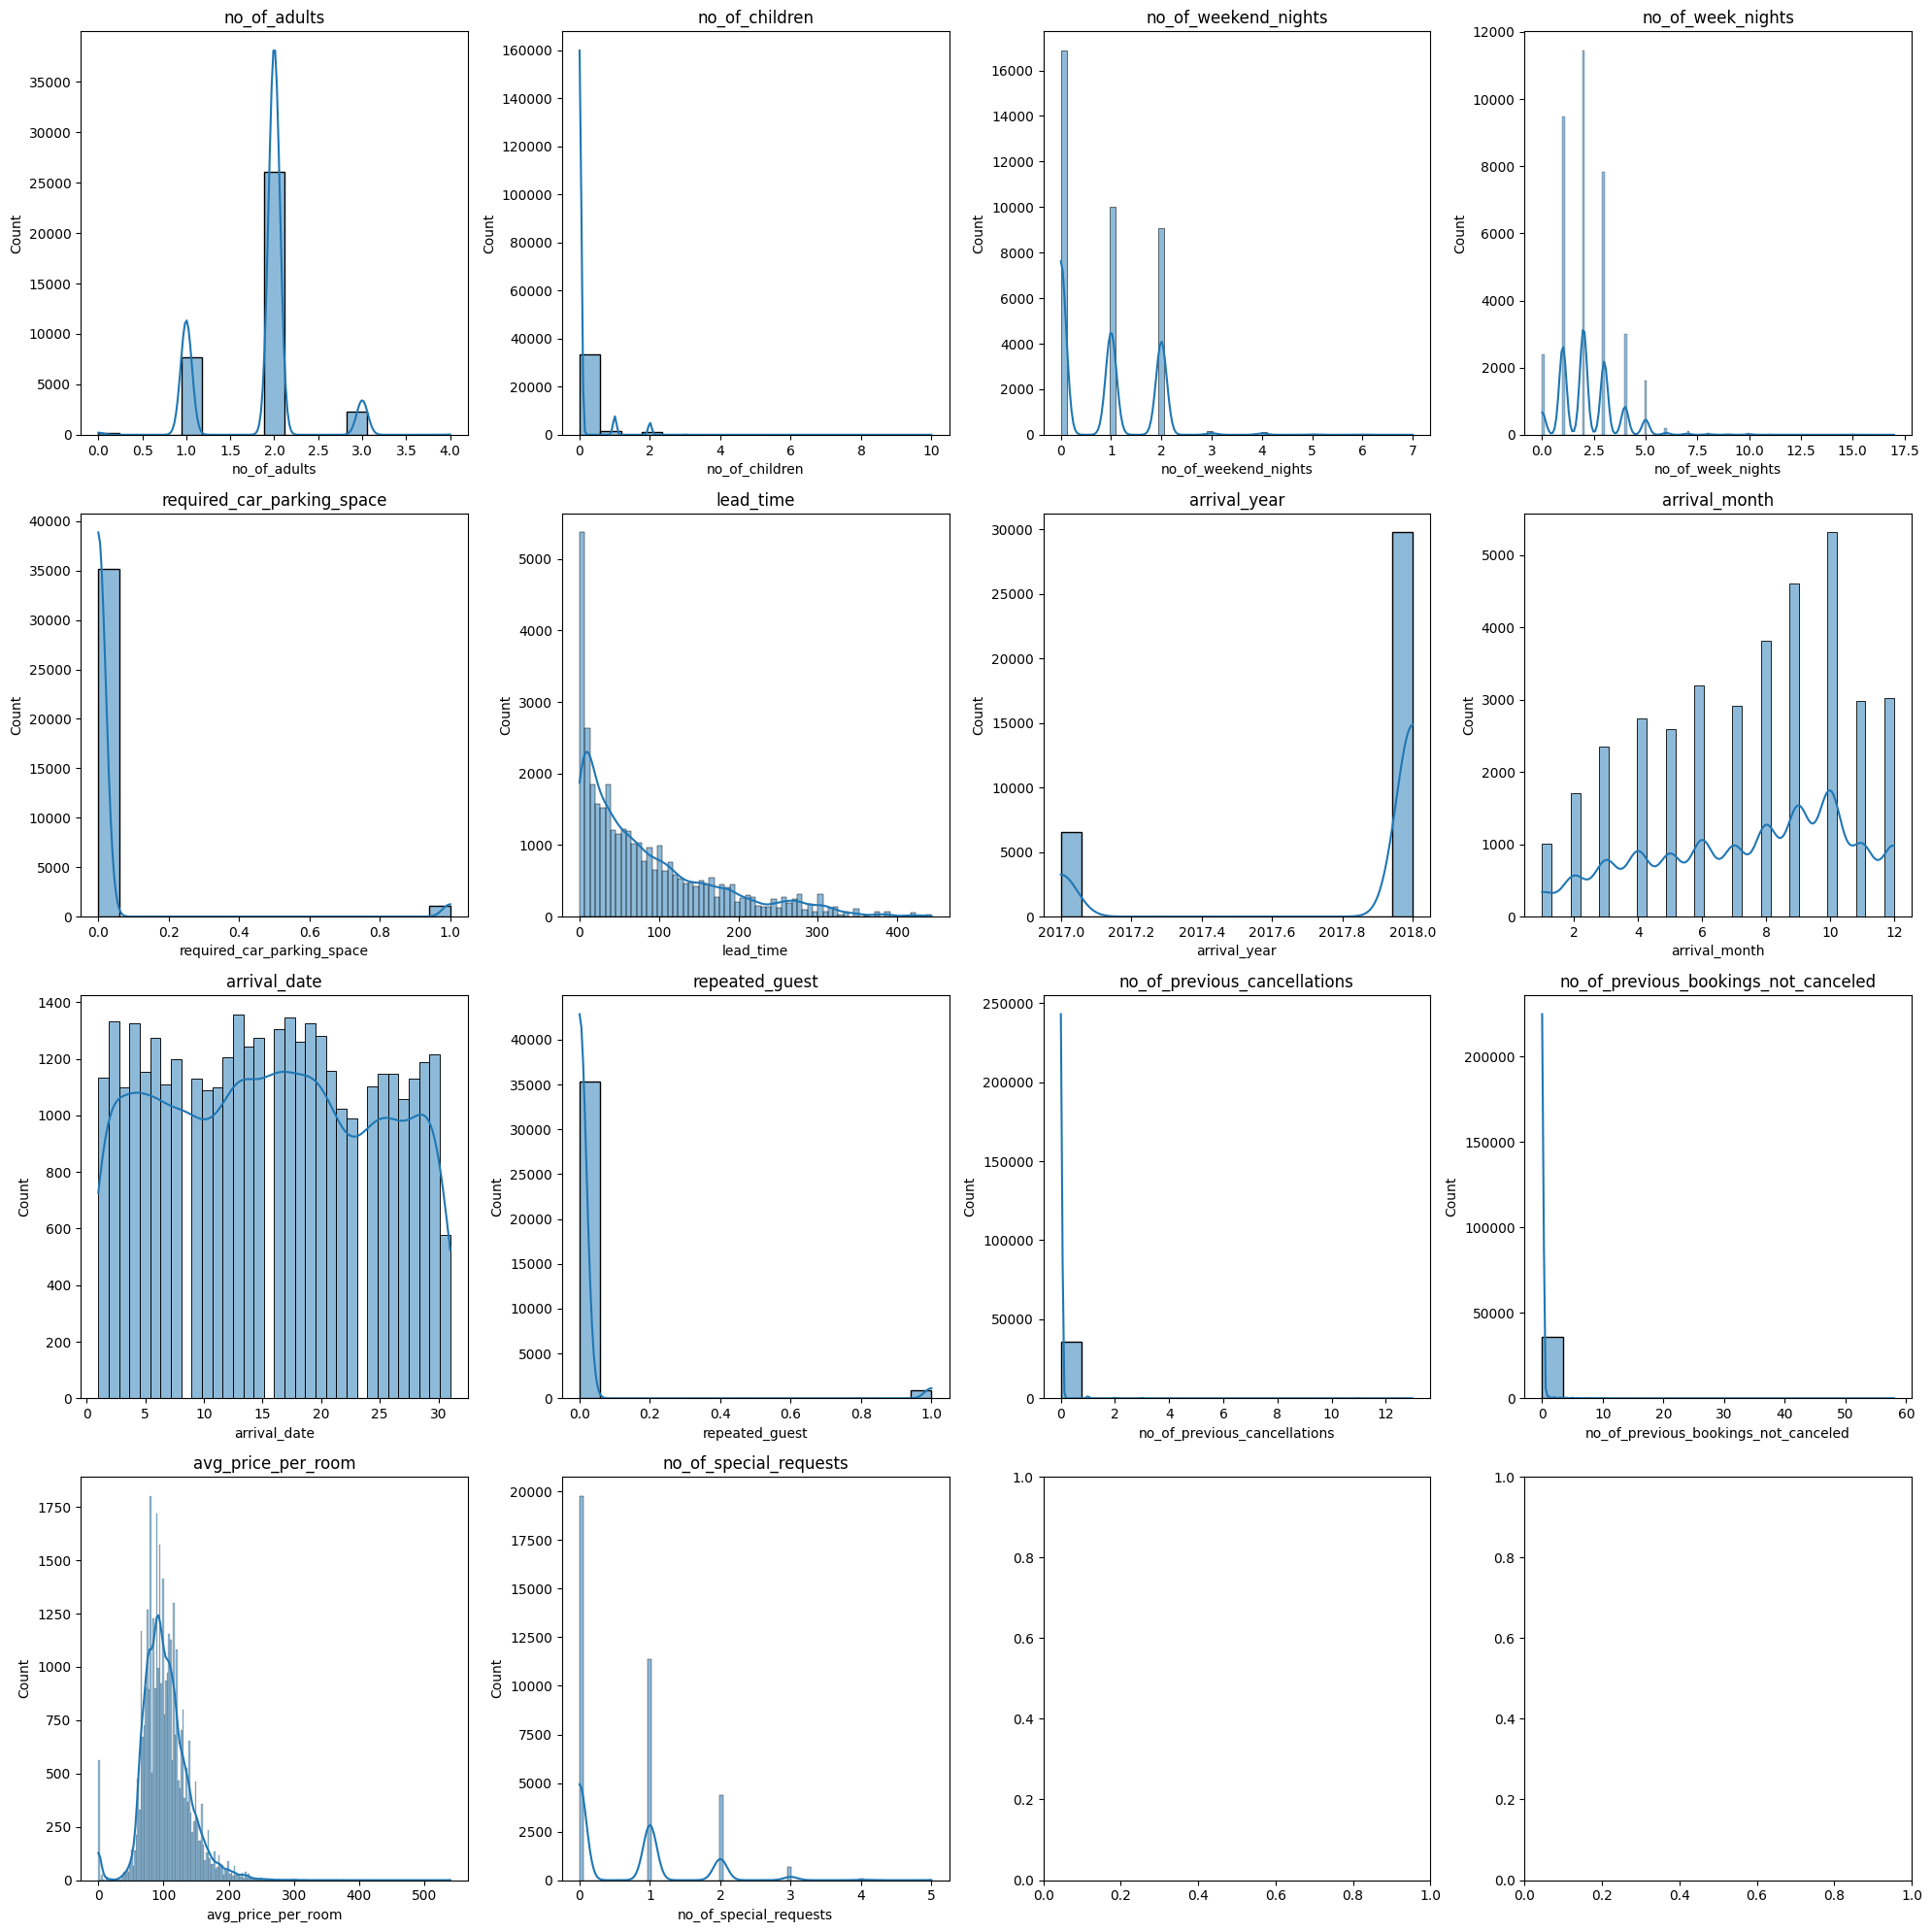

In [16]:
# Plotting distributions of numerical features
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

columns = numeric_columns
index = 0

for i in range(4):
    for j in range(4):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

The histograms provide insights into the distribution of the numerical variables in the dataset:

1. '**no_of_adults**', '**no_of_children**': These variables show a skewed distribution, with a majority of bookings involving fewer adults or children.

2. '**no_of_weekend_nights**', '**no_of_week_nights**': These variables also display a skewed distribution, indicating that most bookings are for a smaller number of nights.

3. '**required_car_parking_space**': The distribution is heavily skewed towards bookings that do not require a parking space.

4. '**lead_time**': This variable shows a wide range, with a large number of bookings made with a short lead time, and fewer bookings as the lead time increases.

5. '**arrival_year**', '**arrival_month**', '**arrival_date**': These variables show distributions that align with the expected range of dates. The 'arrival_year' distribution suggests a possible increase or decrease in bookings over the years.

6. '**repeated_guest**': Most bookings are made by guests who have not stayed before.

7. '**no_of_previous_cancellations**', '**no_of_previous_bookings_not_canceled**': Both variables are heavily skewed, with most values concentrated near zero, indicating few cancellations or previous bookings for most guests.

8. '**avg_price_per_room**': The distribution is right-skewed, with most bookings at a lower average price and a few at a much higher price.

9. '**no_of_special_requests**': This variable is skewed towards fewer special requests per booking.

### Correlation Analysis

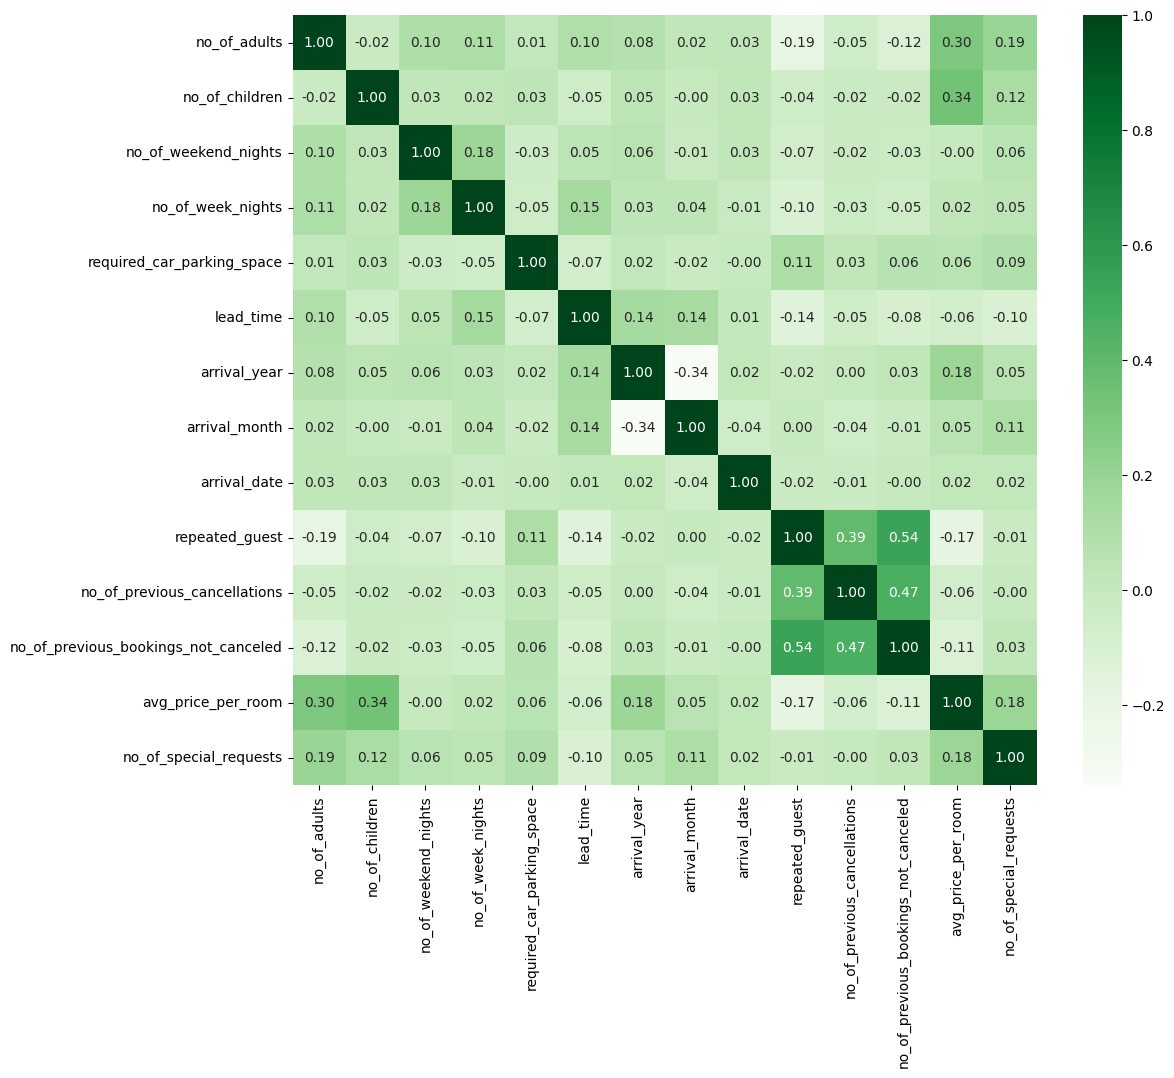

In [17]:
# Create a heatmap of the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.show()

The correlation matrix provides insights into the relationships between different numerical variables. Key observations include:

* '**repeated_guest**' has a positive correlation with '**no_of_previous_bookings_not_canceled**' and a moderate positive correlation with ''**no_of_previous_cancellations**. This indicates that repeated guests do not tend to cancel previous bookings. 
* '**avg_price_per_room**' has a moderate positive correlation with '**no_of_adults**' and '**no_of_children**'. This might indicate that rooms booked for more people tend to be more expensive.
* '**lead_time**' shows a negative correlation with several variables like '**no_of_special_requests**', '**required_car_parking_space**', and '**repeated_guest**', suggesting that longer lead times might be associated with fewer special requests, less need for parking, and fewer repeated guests.
* '**no_of_adults**' and '**no_of_special_requests**' are positively correlated, indicating that bookings involving more adults tend to have more special requests.
* There are correlations between some of the booking details like '**no_of_weekend_nights**', '**no_of_week_nights**', and '**avg_price_per_room**', which are expected in hotel reservation data.

---
## Data Cleaning and Preprocessing

### Encoding

**Label Encoding**: We'll do label encoding of the following categorical variables:
* Booking_ID
* type_of_meal_plan
* room_type_reserved
* market_segment_type
* booking_status

In [18]:
# Label Encoding

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
# label encode Booking_ID
df['Booking_ID_encoded'] = le.fit_transform(df['Booking_ID'])

# label encode type_of_meal_plan
df['type_of_meal_plan_encoded'] = le.fit_transform(df['type_of_meal_plan'])

# label encode room_type_reserved
df['room_type_reserved_encoded'] = le.fit_transform(df['room_type_reserved'])

# label encode market_segment_type
df['market_segment_type_encoded'] = le.fit_transform(df['market_segment_type'])

# label encode booking_status
df['booking_status_encoded'] = le.fit_transform(df['booking_status'])

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Booking_ID_encoded,type_of_meal_plan_encoded,room_type_reserved_encoded,market_segment_type_encoded,booking_status_encoded
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,0,0,0,3,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,1,3,0,4,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2,0,0,4,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,3,0,0,4,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,4,3,0,4,0


In [19]:
# Remove the original categorical columns from the encoded dataset
categorical_columns = ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
df_encoded = df.drop(categorical_columns, axis=1)
df_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoded,type_of_meal_plan_encoded,room_type_reserved_encoded,market_segment_type_encoded,booking_status_encoded
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,0,3,1
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,1,3,0,4,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,2,0,0,4,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,3,0,0,4,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,4,3,0,4,0


In [20]:
# save the encoded dataset into a csv file
df_encoded.to_csv('hotel_booking_encoded.csv', index=False)

### Standardization for KNN algorithm

We'll do the scaling of features after splitting the data into training and testing datasets.

---
## Data Analysis Questions

### Q1. What is the relationship of market segment type with booking status?

In [21]:
# Group the data by market segment type and booking status, count the number of bookings per status for each market segment
market_segment_by_booking = df.groupby(['market_segment_type', 'booking_status']).count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='bookings',ascending=False)
market_segment_by_booking

,market_segment_type,booking_status,bookings
8,Online,Not_Canceled,14739
7,Online,Canceled,8475
6,Offline,Not_Canceled,7375
5,Offline,Canceled,3153
4,Corporate,Not_Canceled,1797
2,Complementary,Not_Canceled,391
3,Corporate,Canceled,220
1,Aviation,Not_Canceled,88
0,Aviation,Canceled,37


<Axes: xlabel='market_segment_type', ylabel='bookings'>

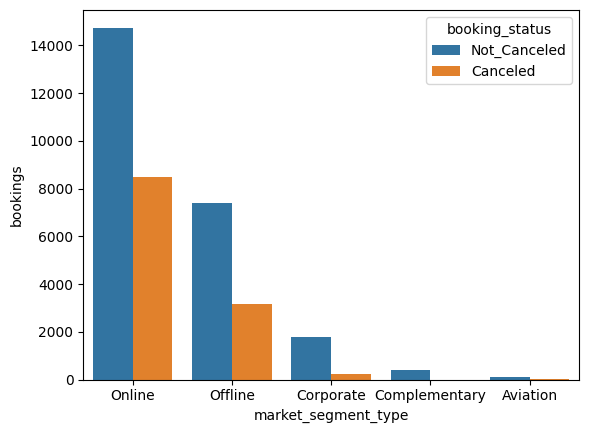

In [22]:
# Create a grouped bar plot of market segment by bookings
sns.barplot(data=market_segment_by_booking, x='market_segment_type', y='bookings', hue='booking_status')

**Insights**
* Almost one-third of the Online, Offline, and Aviation bookings are canceled.
* Almost 11% of the Corporate bookings are canceled.
* Complementary bookings are never canceled.

### Q2. Is there any relationship between the type of room reserved and booking status?

In [23]:
# Group the data by room type reserved and booking status, count the number of bookings per status for each room type
room_type_by_booking = df.groupby(['room_type_reserved', 'booking_status']).count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='bookings', ascending=False)
room_type_by_booking

,room_type_reserved,booking_status,bookings
1,Room_Type 1,Not_Canceled,19058
0,Room_Type 1,Canceled,9072
7,Room_Type 4,Not_Canceled,3988
6,Room_Type 4,Canceled,2069
11,Room_Type 6,Not_Canceled,560
3,Room_Type 2,Not_Canceled,464
10,Room_Type 6,Canceled,406
2,Room_Type 2,Canceled,228
9,Room_Type 5,Not_Canceled,193
13,Room_Type 7,Not_Canceled,122


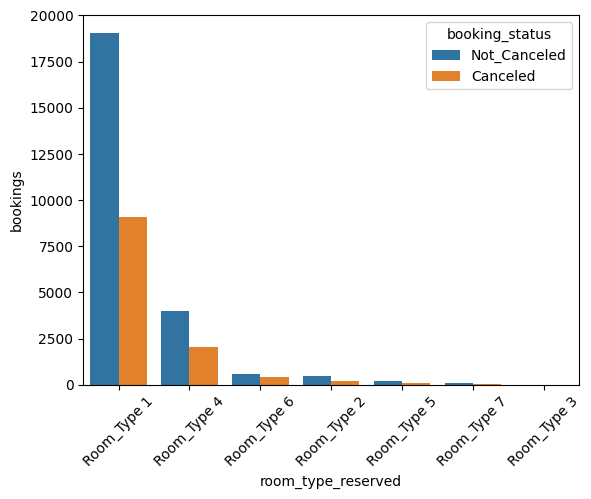

In [24]:
# Create a grouped bar plot of room type reserved by bookings
sns.barplot(data=room_type_by_booking, x='room_type_reserved', y='bookings', hue='booking_status')
plt.xticks(rotation=45)
plt.show()

**Insights**
* There seems to be a similar pattern in booking status for each room type reserved.
* Approximately one-third of the bookings are canceled for every room type reserved.

### Q3. Does lead time (number of days between the date of booking and the arrival date) affect the booking status?

<Axes: xlabel='lead_time', ylabel='Count'>

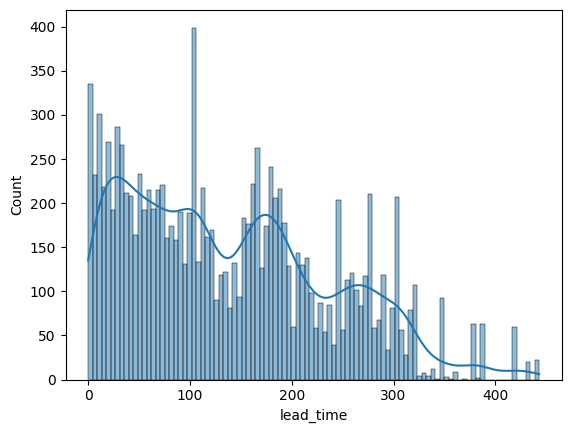

In [25]:
# Plot a histogram of lead time vs. canceled bookings
sns.histplot(df[df['booking_status'] == 'Canceled'], x='lead_time', kde=True, bins=100)

**Insights**
* Overall trend shows that number of cancellations tend to decrease with the increase in lead time.

### Q4. Does average price per room affect the booking status in any way?

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

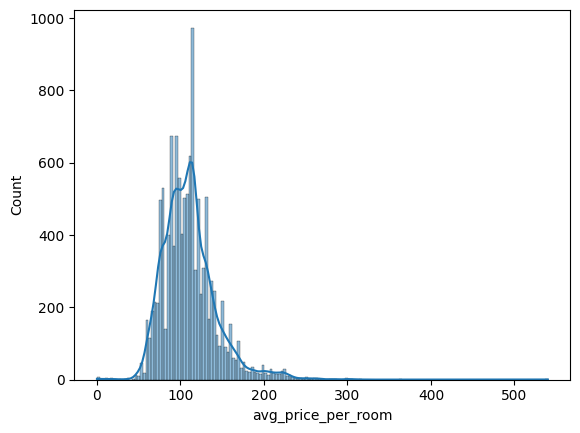

In [26]:
# Plot a histogram of average price per room vs. canceled bookings
sns.histplot(df[df['booking_status'] == 'Canceled'], x='avg_price_per_room', kde=True)

**Insights**
* The plot shows a slightly right skewed distribution. Maximum cancellations are around the mean of avg_price per room. Cancellations tend to decrease for very low and very high avg_price_per_room.

### Q5. What is the impact of number of previous cancellations on booking status?

In [27]:
# Group the data (canceled bookings) by number of previous cancellations and booking status, count the number of bookings per status for each number of previous cancellations
previous_cancellations_by_booking = df[df['booking_status']=='Canceled'].groupby(['no_of_previous_cancellations', 'booking_status']).count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='bookings', ascending=False)
previous_cancellations_by_booking

,no_of_previous_cancellations,booking_status,bookings
0,0,Canceled,11869
1,1,Canceled,11
3,13,Canceled,4
2,3,Canceled,1


**Insights**
* The above table shows that booking cancellations don't depend on previously canceled bookings because most of the bookings which have been canceled don't have any previous cancellations.

### Q6. Does seasonality has an effect on booking cancellation?

In [28]:
bookings_canceled_by_year_month = df[df['booking_status'] == 'Canceled'].groupby(['arrival_year', 'arrival_month']).count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='arrival_month')
bookings_canceled_by_year_month

,arrival_year,arrival_month,bookings
6,2018,1,24
7,2018,2,430
8,2018,3,700
9,2018,4,995
10,2018,5,948
11,2018,6,1291
12,2018,7,1071
0,2017,7,243
1,2017,8,185
13,2018,8,1303


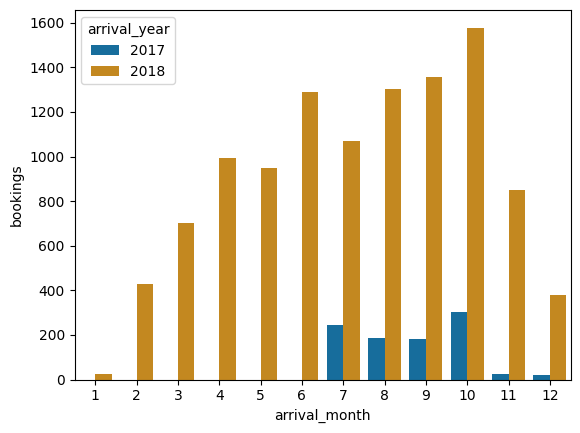

In [29]:
# Create a grouped bar plot of bookings canceled by month and year
color_palette = sns.color_palette(palette='colorblind')
sns.barplot(data=bookings_canceled_by_year_month, x='arrival_month', y='bookings', hue='arrival_year', palette=color_palette)
plt.show()

**Insights**
* Highest number of bookings have been canceled in October followed by September, August, and June.
* Lowest number of bookings have been canceled in January followed by December.
* A general pattern shows that less number of bookings are canceled in Winter months like December, January, and February as compared to other months of the year.

### Q7. What is the relationship of week night bookings with booking status?

In [30]:
# Group the data by number of week nights and booking status, count the number of bookings for each number of week nights 
bookings_by_week_nights = df.groupby(['no_of_week_nights', 'booking_status']).count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='no_of_week_nights')
bookings_by_week_nights

,no_of_week_nights,booking_status,bookings
0,0,Canceled,679
1,0,Not_Canceled,1708
2,1,Canceled,2572
3,1,Not_Canceled,6916
4,2,Canceled,3997
5,2,Not_Canceled,7447
6,3,Canceled,2574
7,3,Not_Canceled,5265
9,4,Not_Canceled,1847
8,4,Canceled,1143


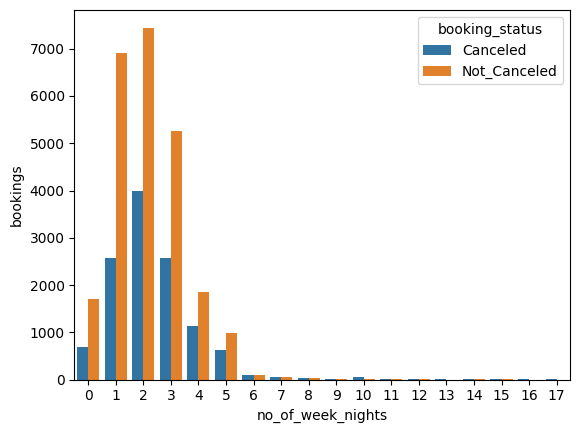

In [31]:
# Create a grouped bar plot of bookings by week nights
sns.barplot(data=bookings_by_week_nights, x='no_of_week_nights', y='bookings', hue='booking_status')
plt.show()

**Insights**
* Highest number of canceled bookings have 2 week nights booked followed by 1 and 3 week nights.  

### Q8. What is the relationship of weekend night bookings with booking status?

In [32]:
# Group the data by number of week end nights and booking status, count the number of bookings for each number of week nights 
bookings_by_weekend_nights = df.groupby(['no_of_weekend_nights', 'booking_status']).count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='no_of_weekend_nights')
bookings_by_weekend_nights

,no_of_weekend_nights,booking_status,bookings
0,0,Canceled,5093
1,0,Not_Canceled,11779
2,1,Canceled,3432
3,1,Not_Canceled,6563
4,2,Canceled,3157
5,2,Not_Canceled,5914
6,3,Canceled,74
7,3,Not_Canceled,79
8,4,Canceled,83
9,4,Not_Canceled,46


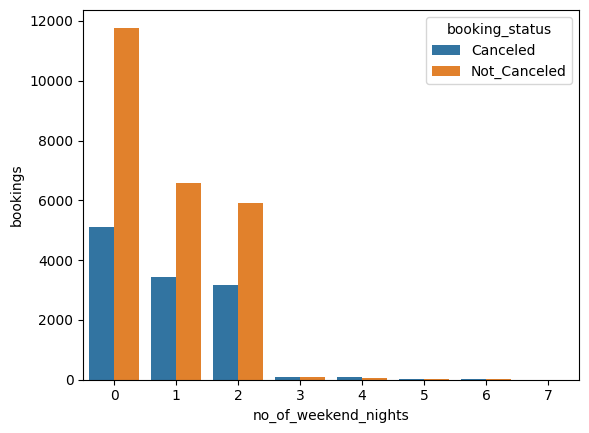

In [33]:
# Create a grouped bar plot of bookings by week end nights
sns.barplot(data=bookings_by_weekend_nights, x='no_of_weekend_nights', y='bookings', hue='booking_status')
plt.show()

**Insights**
* Highest number of canceled bookings have no weekend night booked followed by 1 and 2 weekend nights.

### Q9. Do repeated guests cancel bookings more often than new guests? 

In [34]:
# Group the canceled bookings by repeated guests (0 - No, 1 - Yes)
canceled_bookings_by_repeated_guests = df[df['booking_status'] == 'Canceled'].groupby('repeated_guest').count()['Booking_ID'].to_frame().rename(columns={'Booking_ID':'bookings'}).reset_index()
canceled_bookings_by_repeated_guests

,repeated_guest,bookings
0,0,11869
1,1,16


**Insights**
* The table shows that maximum bookings have been canceled by new guests indicating that repeated guests don't tend to cancel a lot of bookings.

### Q10. Is there any relationship between days of a month and cancelation of bookings?

In [35]:
# Group the canceled bookings by arrival date
bookings_canceled_by_date = df[df['booking_status'] == 'Canceled'].groupby(['arrival_date']).count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='arrival_date')
bookings_canceled_by_date

,arrival_date,bookings
0,1,465
1,2,308
2,3,403
3,4,474
4,5,328
5,6,444
6,7,364
7,8,356
8,9,294
9,10,318


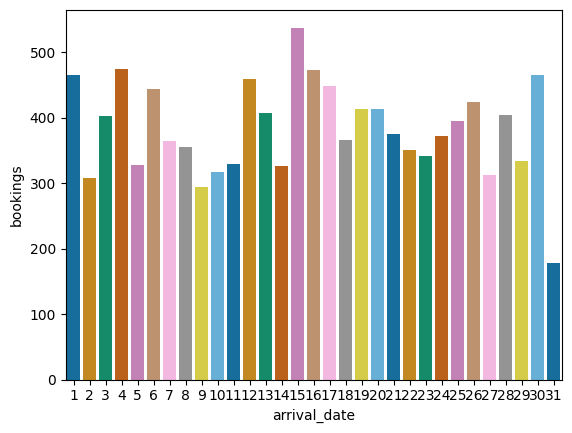

In [36]:
# Create a grouped bar plot of bookings canceled by month and year
color_palette = sns.color_palette(palette='colorblind')
sns.barplot(data=bookings_canceled_by_date, x='arrival_date', y='bookings', palette=color_palette)
plt.show()

**Insights**
* There doesn't seem to be much variation in booking cancelations by days of month, the distribution is nearly uniform.
* Least number of bookings seem to be canceled on the 31st but that might be because 31st is only in half of the months of the year. 

### Q11. Does number of adults have any effect on booking status?

In [37]:
# Group the canceled bookings by number of adults
bookings_canceled_by_adults = df[df['booking_status'] == 'Canceled'].groupby('no_of_adults').count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='bookings', ascending=False)
bookings_canceled_by_adults

,no_of_adults,bookings
2,2,9119
1,1,1856
3,3,863
0,0,44
4,4,3


**Insights**
* The table shows that highest number of canceled bookings are by 2 adults followed by 1 adult.

### Q12. Does number of children have any effect on booking status? 

In [38]:
# Group the canceled bookings by number of children
bookings_canceled_by_children = df[df['booking_status'] == 'Canceled'].groupby('no_of_children').count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='bookings', ascending=False)
bookings_canceled_by_children

,no_of_children,bookings
0,0,10882
1,1,540
2,2,457
3,3,5
4,9,1


**Insights**
* The table shows that highest number of canceled bookings are the ones without any children.

### Q13. What is the relationship of number of special requests and booking status?

In [39]:
# Group the canceled bookings by number of special requests
bookings_canceled_by_special_requests = df[df['booking_status'] == 'Canceled'].groupby('no_of_special_requests').count()['Booking_ID'].to_frame().\
    rename(columns={'Booking_ID':'bookings'}).reset_index().sort_values(by='bookings', ascending=False)
bookings_canceled_by_special_requests

,no_of_special_requests,bookings
0,0,8545
1,1,2703
2,2,637


**Insights**
* The table shows that booking cancellations have no significant relationship with number of special requests as the highest number of canceled bookings have no special requests at all.

### Q14. Does required car parking space play any role in cancelation of bookings? 

In [40]:
# Group the canceled bookings by required car parking space (0 - No, 1 - Yes)
canceled_bookings_by_required_parking = df[df['booking_status'] == 'Canceled'].groupby('required_car_parking_space').count()['Booking_ID'].to_frame()\
    .rename(columns={'Booking_ID':'bookings'}).reset_index()
canceled_bookings_by_required_parking

,required_car_parking_space,bookings
0,0,11771
1,1,114


**Insights**
* Required car parking space does not have a significant impact on booking cancellations as 99% of canceled bookings do not require a car parking space.

### Q15. Do the guests who canceled their bookings prefer selecting a meal plan while booking their stay at the hotel?

In [41]:
bookings_by_meal_plan = df.groupby('booking_status')['type_of_meal_plan'].value_counts().to_frame().reset_index()
bookings_by_meal_plan

,booking_status,type_of_meal_plan,count
0,Canceled,Meal Plan 1,8679
1,Canceled,Not Selected,1699
2,Canceled,Meal Plan 2,1506
3,Canceled,Meal Plan 3,1
4,Not_Canceled,Meal Plan 1,19156
5,Not_Canceled,Not Selected,3431
6,Not_Canceled,Meal Plan 2,1799
7,Not_Canceled,Meal Plan 3,4


<Axes: xlabel='type_of_meal_plan', ylabel='count'>

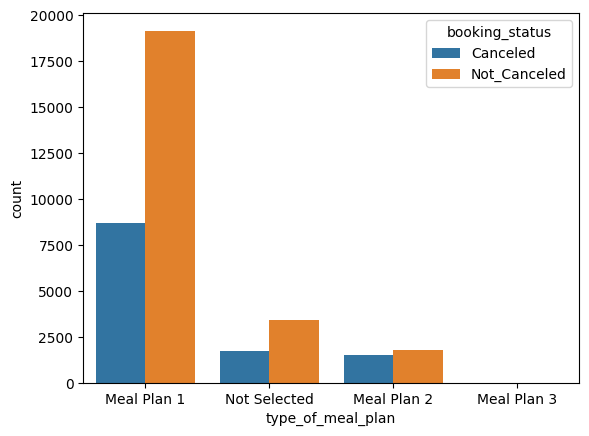

In [42]:
# Create a grouped bar chart of bookings by meal plan
sns.barplot(data=bookings_by_meal_plan, x='type_of_meal_plan', y='count', hue='booking_status') 

**Insights**
* Meal Plans have the same pattern in preference for all bookings whether they have been canceled or not canceled.

---
# Predictive Modeling

## **K-Nearest Neighbors (KNN)**

### Splitting the data into features and target variable

In [43]:
# Split the data into features and target variable
X = df_encoded.drop('booking_status_encoded', axis=1)
y = df_encoded['booking_status_encoded']

### Splitting the dataset into training and test sets

In [44]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the features

In [45]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying KNN algorithm with all features and an arbitrary K value

In [46]:
# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(5, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(5, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)


# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Euclidean Accuracy: 0.8352860096485183
Euclidean Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      2416
           1       0.86      0.90      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.82      0.81      0.81      7255
weighted avg       0.83      0.84      0.83      7255

Manhattan Accuracy: 0.8482425913163336
Manhattan Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      2416
           1       0.87      0.90      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.83      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



## KNN - Interpretation:

#### **KNN - using Euclidean distance**
**Euclidean Accuracy**: 83.5%\
Euclidean accuracy indicates that around 83.5% of the predictions made by the model (using Euclidean distance) are correct.\
This is a good accuracy rate for a binary classification problem.

**Precision**:  
Class 0 (Booking Not Canceled): Precision is 0.77, meaning that when the model predicts 'Booking Not Canceled', it is correct 77% of the time.  
Class 1 (Booking Canceled): Precision is 0.86, indicating that when the model predicts 'Booking Canceled', it is correct 86% of the time.  

**Recall**:  
Class 0: Recall is 0.71, signifying that the model correctly identifies 71% of all actual 'Booking Not Canceled' cases.  
Class 1: Recall is 0.90, meaning the model correctly identifies 90% of all actual 'Booking Canceled' cases.  

**F1-Score**:  
The F1-score combines precision and recall into a single metric, balancing the trade-off between them. It is particularly useful when the class distribution is imbalanced.  
Class 0: F1-score is 0.74, indicating a good balance between precision and recall.  
Class 1: F1-score is 0.88, suggesting a slightly better balance for 'Booking Canceled' predictions.

#### **KNN - using Manhattan distance**
**Manhattan Accuracy**: 84.8%\
Manhattan accuracy indicates that around 84.8% of the predictions made by the model (using Manhattan distance) are correct.\
This is a good accuracy rate for a binary classification problem.

**Precision**:  
Class 0 (Booking Not Canceled): Precision is 0.79, meaning that when the model predicts 'Booking Not Canceled', it is correct 79% of the time.  
Class 1 (Booking Canceled): Precision is 0.87, indicating that when the model predicts 'Booking Canceled', it is correct 87% of the time.  

**Recall**:  
Class 0: Recall is 0.74, signifying that the model correctly identifies 74% of all actual 'Booking Not Canceled' cases.  
Class 1: Recall is 0.90, meaning the model correctly identifies 90% of all actual 'Booking Canceled' cases.  

**F1-Score**:  
The F1-score combines precision and recall into a single metric, balancing the trade-off between them. It is particularly useful when the class distribution is imbalanced.  
Class 0: F1-score is 0.76, indicating a good balance between precision and recall.  
Class 1: F1-score is 0.89, suggesting a slightly better balance for 'Booking Canceled' predictions.

## Applying KNN model with features which have a significant relationship with the target variable (booking_status_encoded) based on data analysis and visualizations

In [47]:
# Split the data into features and target variable
X_selected = df_encoded[['no_of_adults', 'no_of_children', 'market_segment_type_encoded', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_week_nights', 'no_of_weekend_nights', 'avg_price_per_room']]
y_selected = df_encoded['booking_status_encoded']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(5, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(5, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)


# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Euclidean Accuracy: 0.8104755341144039
Euclidean Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      2416
           1       0.83      0.89      0.86      4839

    accuracy                           0.81      7255
   macro avg       0.79      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255

Manhattan Accuracy: 0.8121295658166782
Manhattan Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.69      2416
           1       0.83      0.90      0.86      4839

    accuracy                           0.81      7255
   macro avg       0.80      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255



## Interpretation:

**Euclidean Accuracy** (81.05%) and **Manhattan Accuracy** (81.21%):
These metrics indicate that the model is performing well on both Euclidean distance and Manhattan distance based on the accuracy scores.
The accuracy with Euclidean distance as well as Manhattan distance is slightly lower as compared to the model with all features.

**Precision**:  
Class 0: Slightly lower precision for Euclidean distance (0.75) compared to Manhattan distance (0.76).     
Class 1: Similar precision for both distance measures (around 0.83), indicating consistent performance in predicting 'Booking Canceled'.

**Recall**:  
Class 0: The recall is similar for both models, around 0.64, suggesting consistent performance in identifying actual 'Booking Not Canceled' cases.  
Class 1: The recall is slightly better in the Manhattan model (0.90) compared to the Euclidean model (0.89).

**F1-Score**:  
Class 0: The F1-scores are lower as compared to the model with all features, indicating slightly decreased performance.  
Class 1: Similar to Class 0, the F1-scores are indicative of a slightly decreased performance in predicting 'Booking Canceled' as compared to the model with all features.

## Comparison of Both Models (All features vs Selected features)

**Accuracy**: The model with all features has a better Euclidean accuracy and Manhattan accuracy as compared to the model with selected features. 

**Precision and Recall**: The model with all features shows slightly better precision and recall for 'Booking Not Canceled' and 'Booking Canceled'. This might indicate that using all features helps the model in distinguishing 'Booking Canceled' more accurately.

**F1-Score**: Scores are lower for model with selected features as compared to model with all features, suggesting that the reduction of features significantly impacts the balance between precision and recall.

**Model Complexity**: Both the models are complex in terms of the number of features. This complexity has an impact on model interpretability and performance in case of large datasets. 

**Generalization**: Although the accuracy of the model with fewer features is slightly lower, it might generalize better to unseen data as it's less likely to overfit compared to a model with more features. 

## Correlation Analysis of the Encoded Dataset

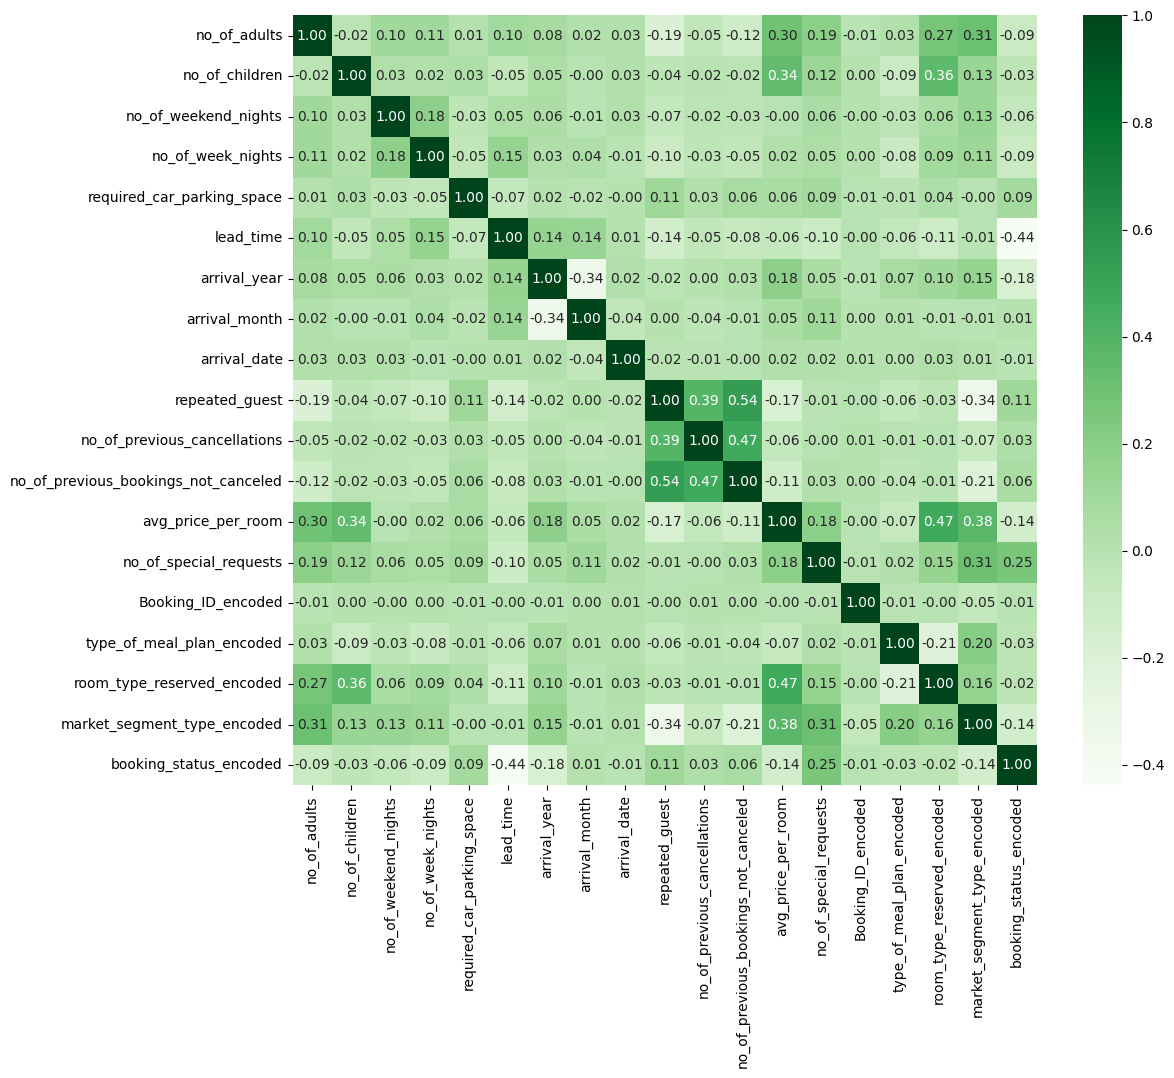

In [48]:
# Create a heatmap of the correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.show()

### Correlation of each feature with the target variable (booking_status_encoded)

In [49]:
# Extracting the correlation of each feature with the target variable 'booking_status_encoded'
target_correlation = correlation_matrix["booking_status_encoded"].sort_values(ascending=False)

# Display correlations
target_correlation

booking_status_encoded                  1.000000
no_of_special_requests                  0.253070
repeated_guest                          0.107287
required_car_parking_space              0.086185
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
arrival_month                           0.011233
Booking_ID_encoded                     -0.006237
arrival_date                           -0.010629
room_type_reserved_encoded             -0.022986
type_of_meal_plan_encoded              -0.026706
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_adults                           -0.086920
no_of_week_nights                      -0.092996
market_segment_type_encoded            -0.136008
avg_price_per_room                     -0.142569
arrival_year                           -0.179529
lead_time                              -0.438538
Name: booking_status_encoded, dtype: float64

The features and their correlations with the target variable booking_status_encoded are as follows (sorted by the strength of correlation):

* lead_time: **-0.44**
* arrival_year: **-0.18**
* avg_price_per_room: **-0.14**
* market_segment_type_encoded: **-0.14**
* no_of_week_nights: **-0.09**
* no_of_adults: **-0.09**
* no_of_weekend_nights: **-0.06**
* no_of_children: **-0.03**
* room_type_reserved_encoded: **-0.02**
* type_of_meal_plan_encoded: **-0.03**
* no_of_special_requests: **0.25**
* repeated_guest: **0.11**
* required_car_parking_space: **0.09**
* no_of_previous_bookings_not_canceled: **0.06**

### Multicollinearity Analysis

In [50]:
# Checking for multicollinearity among features
# We consider a high correlation threshold (both positive and negative) to indicate multicollinearity
multicollinearity_threshold = 0.75
highly_correlated_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
multicollinearity = highly_correlated_pairs[(abs(highly_correlated_pairs) > multicollinearity_threshold) & 
                                            (highly_correlated_pairs < 1)]

# Display multicollinearity
multicollinearity

Series([], dtype: float64)

Based on the analysis, there appear to be NO pairs of features with a high degree of multicollinearity (i.e., correlation above the threshold of 0.75 or below -0.75).

## Feature Selection for K-Nearest Neighbors Algorithm
For the K-Nearest Neighbors (KNN) algorithm, it's generally advisable to select features that are most relevant to the target variable. Features with a high correlation (either positive or negative) are typically more informative. However, it's also important to consider multicollinearity, which can distort the predictive power of a model. In this case, since there's no significant multicollinearity, we can focus on the correlation with the target.

Considering the correlation values, the following features seem to be the most relevant for the KNN algorithm:

1. **lead_time**: High negative correlation.
2. **arrival_year**: Moderate negative correlation.
3. **avg_price_per_room**: Moderate negative correlation.
4. **market_segment_type_encoded**: Moderate negative correlation.
5. **no_of_special_requests**: Moderate positive correlation.
   
These features show a stronger linear relationship with booking_status_encoded and could be good predictors for the KNN model. However, KNN can also capture non-linear relationships, so features with lower correlation should not be automatically discounted. Feature selection should ideally be validated with model performance metrics.

## Applying KNN model with selected features based on Correlation Analysis 

In [51]:
# Split the data into features and target variable
X_selected = df_encoded[['lead_time', 'arrival_year', 'avg_price_per_room', 'market_segment_type_encoded', 'no_of_special_requests']]
y_selected = df_encoded['booking_status_encoded']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(5, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(5, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)


# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Euclidean Accuracy: 0.8610613370089594
Euclidean Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      2416
           1       0.88      0.91      0.90      4839

    accuracy                           0.86      7255
   macro avg       0.85      0.83      0.84      7255
weighted avg       0.86      0.86      0.86      7255

Manhattan Accuracy: 0.8606478290833908
Manhattan Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      2416
           1       0.88      0.91      0.90      4839

    accuracy                           0.86      7255
   macro avg       0.85      0.83      0.84      7255
weighted avg       0.86      0.86      0.86      7255



## Interpretation:

**Euclidean Accuracy** (86.11%) and **Manhattan Accuracy** (86.06%):
These metrics indicate that the model is performing very well on both Euclidean distance and Manhattan distance based on the accuracy scores.
The accuracy with Euclidean distance as well as Manhattan distance is significantly higher as compared to the model with all features and the model with selected features before.

**Precision**:  
Class 0: Similar precision for both distance measures (around 0.81), indicating consistent performance in predicting 'Booking Not Canceled'.     
Class 1: Similar precision for both distance measures (around 0.88), indicating consistent performance in predicting 'Booking Canceled'.

**Recall**:  
Class 0: The recall is similar for both models, around 0.75, suggesting consistent performance in identifying actual 'Booking Not Canceled' cases.  
Class 1: The recall is similar for both models, around 0.91, suggesting consistent performance in identifying actual 'Booking Canceled' cases.

**F1-Score**:  
Class 0: The F1-scores are higher as compared to the model with all features and the model with selected features before, indicating significantly increased performance.  
Class 1: Similar to Class 0, the F1-scores are indicative of a significantly increased performance in predicting 'Booking Canceled' as compared to the model with all features and the model with selected features before.

## Improving the model - Finding Optimal K value
To find the optimal K value, we'll use the model based on correlation analysis which gives us the best evaluation metrics (accuracy, precision, recall, F1-score) uptil now.  

In [52]:
# Split the data into features and target variable
X = df_encoded[['lead_time', 'arrival_year', 'avg_price_per_room', 'market_segment_type_encoded', 'no_of_special_requests']]
y = df_encoded['booking_status_encoded']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Minimum error:- 0.13893866299104066 at K = 5


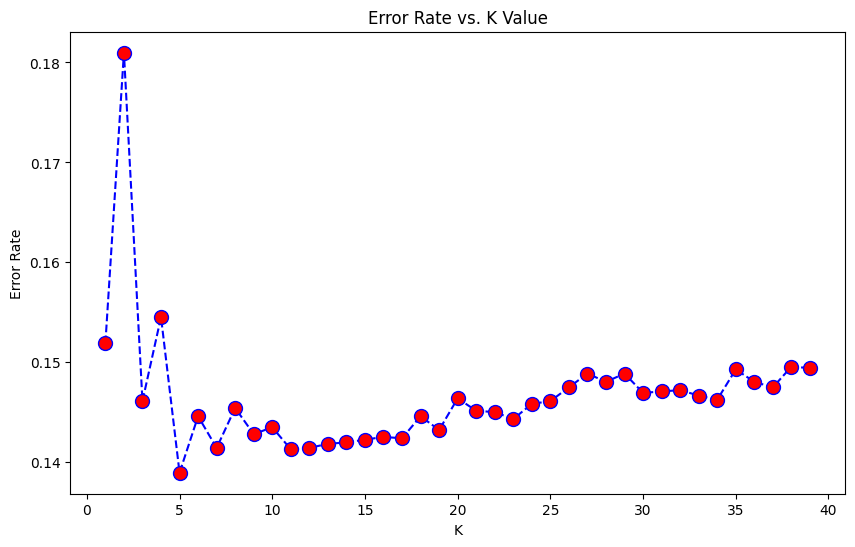

In [53]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_scaled,y_train)
 pred_i = knn.predict(X_test_scaled)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

### **Plot between accuracy and K value**

Maximum accuracy:- 0.8610613370089594 at K = 5


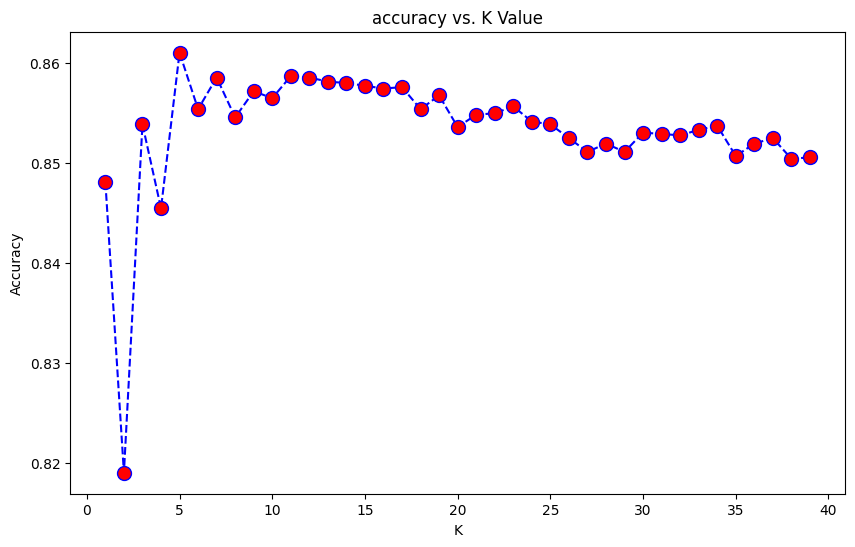

In [54]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_scaled,y_train)
    yhat = neigh.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

## KNN at Optimal K-Value, K=5

The optimal K value is equal to the arbitrary K value chosen by us. This is the best performing model so far with the following metrics:

1. **Euclidean Accuracy**: 86.11%
2. **Manhattan Accuracy**: 86.06%

**Precision**: (Both distances) 
- Class 0: (Booking Not Canceled): 0.81     
- Class 1: (Booking Canceled): 0.88

**Recall**: (Both distances)
- Class 0: (Booking Not Canceled): 0.75    
- Class 1: (Booking Canceled): 0.91

**F1-Score**: (Both distances)
- Class 0: (Booking Not Canceled): 0.78     
- Class 1: (Booking Canceled): 0.90

## **Decision Tree**

### Splitting the data into features and target variable

In [55]:
# Splitting the data into features and target variable
X = df_encoded.drop('booking_status_encoded', axis=1)
y = df_encoded['booking_status_encoded']

### Splitting the dataset into training and testing sets

In [56]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classifier with Gini Impurity

In [57]:
# Initializing and training the Decision Tree Classifier with Gini Impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Decision Tree Classifier with Entropy

In [58]:
# Initializing and training the Decision Tree Classifier with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Making Predictions with Decision Tree Classifier

In [59]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

### Evaluating the Decision Tree Classifier

In [60]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("Accuracy Gini:", accuracy_gini)
print("Accuracy Entropy:", accuracy_entropy)

Accuracy Gini: 0.8515506547208822
Accuracy Entropy: 0.8544452101998622


## Interpretation - Decision Tree
The Decision Tree models have been successfully applied to the dataset using both Gini impurity and Entropy as criteria. Here are the results:

1. **Decision Tree with Gini Impurity Criterion**:  
Accuracy on the test set: Approximately 85.16%

1. **Decision Tree with Entropy Criterion**:  
Accuracy on the test set: Approximately 85.44%

These results indicate that the Decision Tree model with Entropy as the criterion performed slightly better on this dataset compared to the one using Gini impurity.

### Evaluation Metrics for Decision Tree Classifier

Gini Model Evaluation Metrics:
Confusion Matrix:
 [[1913  503]
 [ 574 4265]]
Precision: 0.89
Recall: 0.88
F1 Score: 0.89
ROC AUC: 0.84

Entropy Model Evaluation Metrics:
Confusion Matrix:
 [[1918  498]
 [ 558 4281]]
Precision: 0.90
Recall: 0.88
F1 Score: 0.89
ROC AUC: 0.84


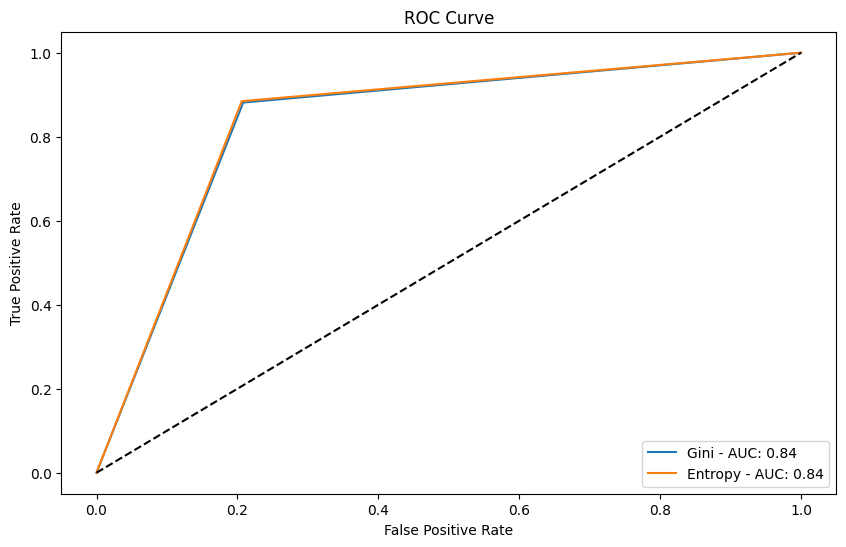

In [61]:
# Evaluation metrics for Gini model
confusion_gini = confusion_matrix(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))
print("ROC AUC: {:.2f}".format(roc_auc_gini))

print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))
print("ROC AUC: {:.2f}".format(roc_auc_entropy))

# ROC curve calculations
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label='Gini - AUC: {:.2f}'.format(roc_auc_gini))
plt.plot(fpr_entropy, tpr_entropy, label='Entropy - AUC: {:.2f}'.format(roc_auc_entropy))
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Evaluation Metrics for Decision Tree Models**
#### **Gini Model:**
Confusion Matrix:  
True Positives (TP): 4265
True Negatives (TN): 1913  
False Positives (FP): 503  
False Negatives (FN): 574

Precision: Approximately 89%

Recall: Approximately 88%

F1 Score: Approximately 89%

ROC AUC: Approximately 84%

#### **Entropy Model:**
Confusion Matrix:  
True Positives (TP): 4281  
True Negatives (TN): 1918  
False Positives (FP): 498  
False Negatives (FN): 558  

Precision: Approximately 90%

Recall: Approximately 88%

F1 Score: Approximately 89%

ROC AUC: Approximately 84%


#### **ROC Curve**
The Receiver Operating Characteristic (ROC) curve is plotted above.
The Area Under the Curve (AUC) for the Gini model is approximately 84%, and for the Entropy model, it's approximately 84% as well.
Interpretation:
The Entropy model shows slightly better performance across most metrics compared to the Gini model.
Both models have similar ROC AUC scores, indicating comparable ability in distinguishing between classes.
Precision, Recall, and F1 Score are balanced for both models, but the Entropy model has a slight edge.

## Feature Importance

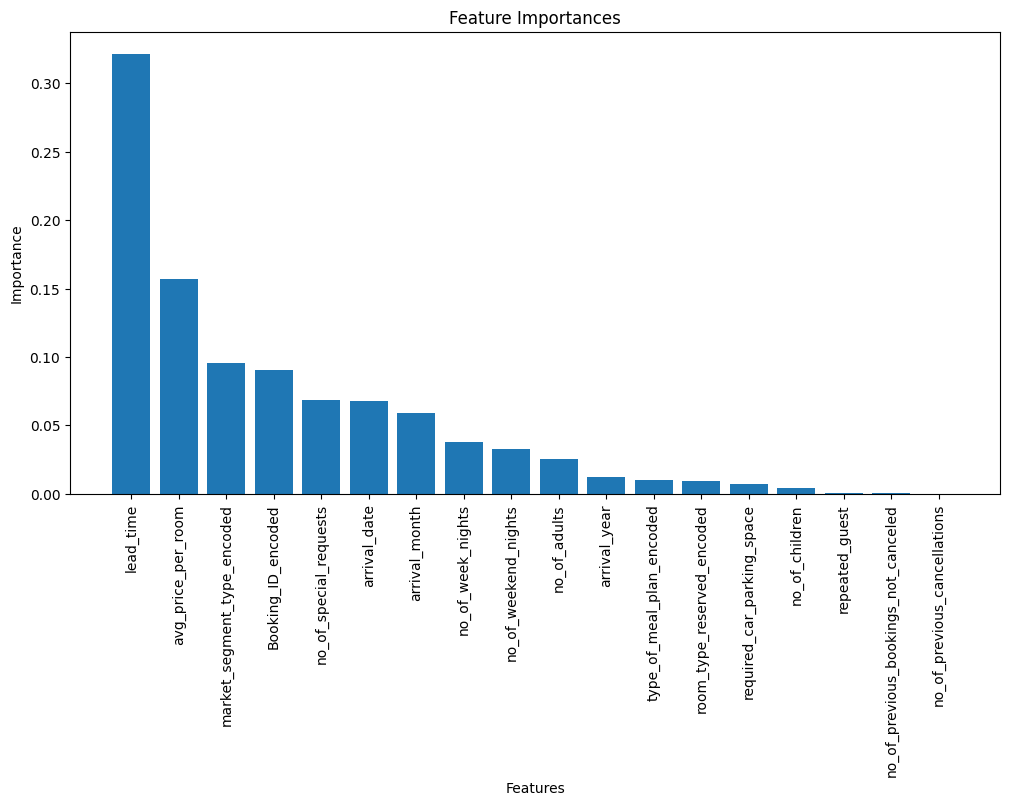

In [62]:
# Split the data into features and target variable
X = df_encoded.drop('booking_status_encoded', axis=1)
y = df_encoded['booking_status_encoded']

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()


## Pruning

In [63]:
# Select the important features and the target variable
important_features = ['lead_time', 'avg_price_per_room', 'market_segment_type_encoded', 'no_of_special_requests', 'arrival_date', 'arrival_month', 'no_of_week_nights', 'no_of_weekend_nights', 'no_of_adults', 'booking_status_encoded']
df_selected_features = df_encoded[important_features]

# Splitting the data
X = df_selected_features.drop('booking_status_encoded', axis=1)
y = df_selected_features['booking_status_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Model with Gini impurity
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

# Training the Decision Tree Model with Entropy
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)

# Making predictions and evaluating the Gini model
y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Making predictions and evaluating the Entropy model
y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Print out the accuracies for both models
print("Accuracy with Gini impurity:", accuracy_gini)
print("Accuracy with Entropy:", accuracy_entropy)


Accuracy with Gini impurity: 0.867539627842867
Accuracy with Entropy: 0.8679531357684356


**New Scores (After Feature Selection):**  
Accuracy with Gini Impurity: 86.75%  
Accuracy with Entropy: 86.80%  

**Previous Scores (Before Feature Selection):**
Accuracy with Gini Impurity: Approximately 85.16%
Accuracy with Entropy: Approximately 85.44%

**Comparison and Analysis:**  
**Increase in Accuracy:** There's a noticeable increase in accuracy for both models after feature selection. This suggests that some of the excluded features might have been contributing valuable information to the model.

**Gini vs. Entropy:** In both scenarios (before and after feature selection), the model using Entropy has a slightly higher accuracy compared to the one using Gini impurity. This pattern remains consistent.

### Evaluation Metrics after Pruning

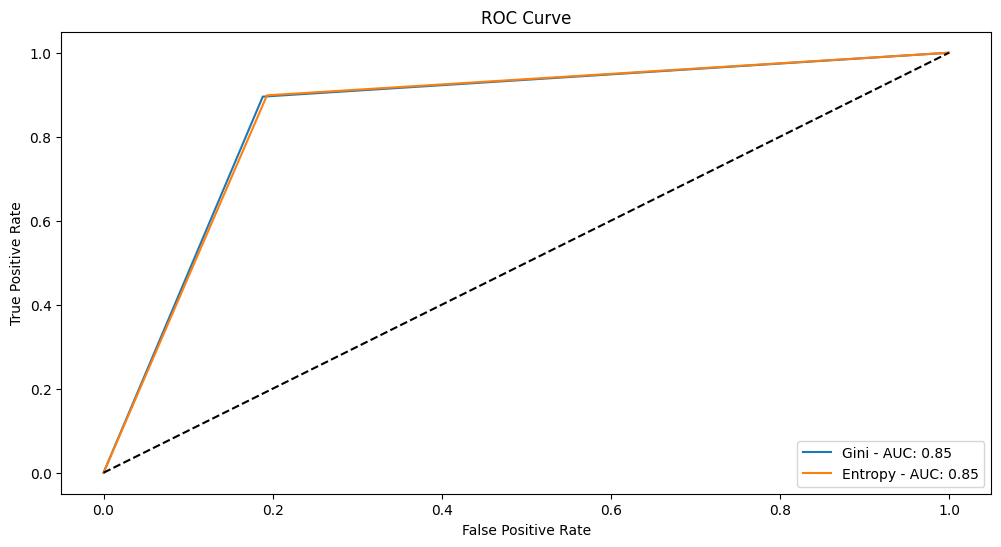

Gini Model Metrics:
Precision: 0.9049707602339181
Recall: 0.8954329406902253
F1 Score: 0.9001765866832866
Confusion Matrix:
 [[1961  455]
 [ 506 4333]]
ROC AUC: 0.8535525630603444

Entropy Model Metrics:
Precision: 0.9030114226375908
Recall: 0.8985327547013846
F1 Score: 0.9007665216490575
Confusion Matrix:
 [[1949  467]
 [ 491 4348]]
ROC AUC: 0.8526190263573148


In [64]:
# Calculating evaluation metrics for the Gini model
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
confusion_matrix_gini = confusion_matrix(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Calculating evaluation metrics for the Entropy model
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
confusion_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# ROC Curves
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_gini, tpr_gini, label=f'Gini - AUC: {roc_auc_gini:.2f}')
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy - AUC: {roc_auc_entropy:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the calculated metrics for Gini model
print("Gini Model Metrics:")
print("Precision:", precision_gini)
print("Recall:", recall_gini)
print("F1 Score:", f1_score_gini)
print("Confusion Matrix:\n", confusion_matrix_gini)
print("ROC AUC:", roc_auc_gini)

# Print the calculated metrics for Entropy model
print("\nEntropy Model Metrics:")
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1 Score:", f1_score_entropy)
print("Confusion Matrix:\n", confusion_matrix_entropy)
print("ROC AUC:", roc_auc_entropy)

### **Evaluation Metrics for Decision Tree Models after Pruning**
#### **Gini Model:**
Confusion Matrix:  
True Positives (TP): 4333
True Negatives (TN): 1961  
False Positives (FP): 455  
False Negatives (FN): 506

Precision: Approximately 90.50%

Recall: Approximately 89.54%

F1 Score: Approximately 90.02%

ROC AUC: Approximately 85.36%

#### **Entropy Model:**
Confusion Matrix:  
True Positives (TP): 4348  
True Negatives (TN): 1949  
False Positives (FP): 467  
False Negatives (FN): 491  

Precision: Approximately 90.30%

Recall: Approximately 88.85%

F1 Score: Approximately 90.08%

ROC AUC: Approximately 85.26%


#### **ROC Curve**
The Receiver Operating Characteristic (ROC) curve is plotted above.
The Area Under the Curve (AUC) for the Gini model is approximately 85%, and for the Entropy model, it's approximately 85% as well.
Interpretation:
The Entropy model shows slightly better performance across most metrics compared to the Gini model.
Both models have similar ROC AUC scores, indicating comparable ability in distinguishing between classes.
Precision, Recall, and F1 Score are balanced for both models, but the Entropy model has a slight edge.

---
# Handling Class Imbalance with SMOTE

In [65]:
# !pip install imblearn

In [66]:
# Splitting the data into features and target variable
X = df_encoded[['lead_time', 'arrival_year', 'avg_price_per_room', 'market_segment_type_encoded', 'no_of_special_requests']]
y = df_encoded['booking_status_encoded']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying SMOTE to balance the dataset

In [67]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

## Applying KNN at Optimal K value, K=5, after SMOTE

In [68]:
# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(5, 'euclidean', X_res, y_res, X_test_scaled, y_test)

# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(5, 'manhattan', X_res, y_res, X_test_scaled, y_test)


# Output the results
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)
print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Euclidean Accuracy: 0.842315644383184
Euclidean Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.77      2416
           1       0.90      0.86      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.82      0.84      0.83      7255
weighted avg       0.85      0.84      0.84      7255

Manhattan Accuracy: 0.8446588559614059
Manhattan Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78      2416
           1       0.90      0.86      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.82      0.84      0.83      7255
weighted avg       0.85      0.84      0.85      7255



## Interpretation - KNN after SMOTE

#### **KNN - using Euclidean distance**
**Euclidean Accuracy**: 84.23%\
Euclidean accuracy indicates that around 84.23% of the predictions made by the model (using Euclidean distance) are correct.\
The accuracy at optimal K value after applying SMOTE has reduced by almost 2%. This is a good accuracy rate for a binary classification problem. 

**Precision**:  
Class 0 (Booking Not Canceled): Precision is 0.74, meaning that when the model predicts 'Booking Not Canceled', it is correct 74% of the time. This precision is significantly less than the precision at optimal K value.  
Class 1 (Booking Canceled): Precision is 0.90, indicating that when the model predicts 'Booking Canceled', it is correct 90% of the time. This precision is improved by 2% than the precision at optimal K value.  

**Recall**:  
Class 0: Recall is 0.82, signifying that the model correctly identifies 82% of all actual 'Booking Not Canceled' cases. This recall is 7% better than the recall at optimal K value.  
Class 1: Recall is 0.86, meaning the model correctly identifies 86% of all actual 'Booking Canceled' cases. This recall is significantly less than the recall at optimal K value.  

**F1-Score**:  
The F1-score combines precision and recall into a single metric, balancing the trade-off between them. It is particularly useful when the class distribution is imbalanced.  
Class 0: F1-score is 0.77, indicating a good balance between precision and recall. This is slightly less than the F1-score at optimal K value.   
Class 1: F1-score is 0.88, suggesting a slightly better balance for 'Booking Canceled' predictions. This is less than the F1-score at optimal K value. 

#### **KNN - using Manhattan distance**
**Manhattan Accuracy**: 84.47%\
Manhattan accuracy indicates that around 84.47% of the predictions made by the model (using Manhattan distance) are correct.\
The accuracy at optimal K value has reduced by almost 2%. This is a good accuracy rate for a binary classification problem.

**Precision**:  
Class 0 (Booking Not Canceled): Precision is 0.74, meaning that when the model predicts 'Booking Not Canceled', it is correct 74% of the time. The precision is significantly reduced than the precision at optimal K value.  
Class 1 (Booking Canceled): Precision is 0.90, indicating that when the model predicts 'Booking Canceled', it is correct 90% of the time. This precision has improved by 2% than the precision at optimal K value.  

**Recall**:  
Class 0: Recall is 0.81, signifying that the model correctly identifies 81% of all actual 'Booking Not Canceled' cases. This recall has improved by 6% than the recall at optimal K value.  
Class 1: Recall is 0.86, meaning the model correctly identifies 86% of all actual 'Booking Canceled' cases. This recall is significantly reduced than the recall at optimal K value.  

**F1-Score**:  
The F1-score combines precision and recall into a single metric, balancing the trade-off between them. It is particularly useful when the class distribution is imbalanced.  
Class 0: F1-score is 0.78, indicating a good balance between precision and recall. This score is slightly less than the F1-score at optimal K value.  
Class 1: F1-score is 0.88, suggesting a slightly better balance for 'Booking Canceled' predictions. This F1-Score is less than the F1-score at optimal K value.

## Applying Decision Tree Classifier after SMOTE

In [69]:
# Select the important features and the target variable
important_features = ['lead_time', 'avg_price_per_room', 'market_segment_type_encoded', 'no_of_special_requests', 'arrival_date', 'arrival_month', 'no_of_week_nights', 'no_of_weekend_nights', 'no_of_adults', 'booking_status_encoded']
df_selected_features = df_encoded[important_features]

# Splitting the data
X = df_selected_features.drop('booking_status_encoded', axis=1)
y = df_selected_features['booking_status_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Training the Decision Tree Model with Gini impurity using resampled data after SMOTE
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_res, y_res)

# Training the Decision Tree Model with Entropy using resampled data after SMOTE
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_res, y_res)

# Making predictions and evaluating the Gini model
y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Making predictions and evaluating the Entropy model
y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Print out the accuracies for both models
print("Accuracy with Gini impurity:", accuracy_gini)
print("Accuracy with Entropy:", accuracy_entropy)

Accuracy with Gini impurity: 0.8697450034458993
Accuracy with Entropy: 0.8635423845623708


**New Scores (After SMOTE):**  
Accuracy with Gini Impurity: 86.97%  
Accuracy with Entropy: 86.35%  

**Previous Scores (Before SMOTE):**
Accuracy with Gini Impurity: Approximately 86.75%
Accuracy with Entropy: Approximately 86.80%

**Comparison and Analysis:**  
**Increase in Accuracy with Gini impurity:** There's a slight increase in accuracy with Gini impurity after applying SMOTE. This suggests that resampling has improved the accuracy.
**Decrease in Accuracy with Entropy:** There's a slight decrease in accuracy with Entropy after applying SMOTE. This suggests that resampling has reduced the accuracy. 

**Gini vs. Entropy:** Before applying SMOTE, the model using Entropy has a slightly better accuracy, whereas after applying SMOTE, the model using Gini impurity has better accuracy.

### Save the Decision Trees

In [70]:
# save the decision trees
from sklearn.tree import export_graphviz

# save the decision tree with gini impurity
export_graphviz(model_gini, out_file='decision_tree_gini.dot', feature_names=X.columns, filled=True, rounded=True)

# save the decision tree with entropy
export_graphviz(model_entropy, out_file='decision_tree_entropy.dot', feature_names=X.columns, filled=True, rounded=True)

### Evaluation Metrics after SMOTE

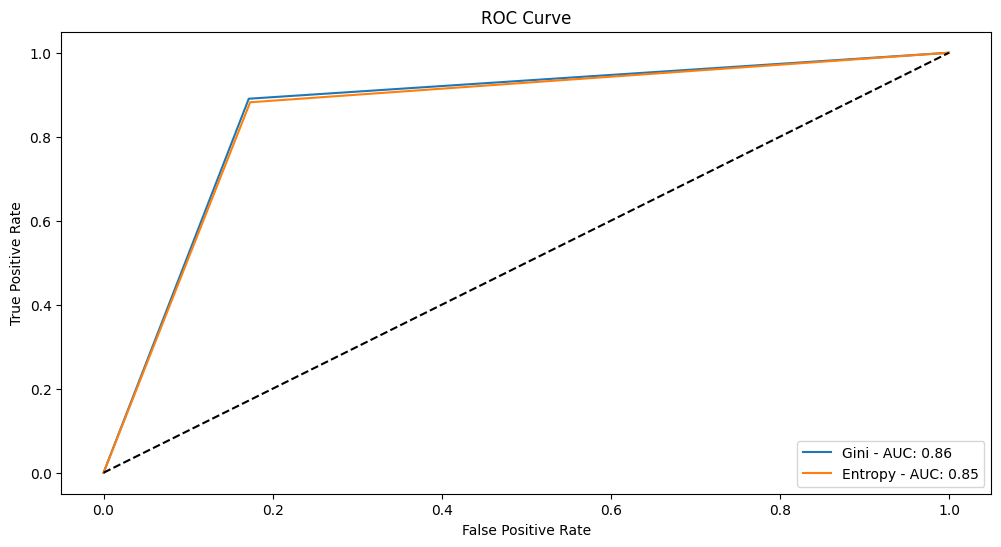

Gini Model Metrics:
Precision: 0.9121507197290432
Recall: 0.8904732382723703
F1 Score: 0.9011816375614348
Confusion Matrix:
 [[2001  415]
 [ 530 4309]]
ROC AUC: 0.8593508575467812

Entropy Model Metrics:
Precision: 0.9106037977384255
Recall: 0.8820004133085348
F1 Score: 0.8960739030023095
Confusion Matrix:
 [[1997  419]
 [ 571 4268]]
ROC AUC: 0.854286630495327


In [71]:
# Calculating evaluation metrics for the Gini model
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
confusion_matrix_gini = confusion_matrix(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Calculating evaluation metrics for the Entropy model
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
confusion_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# ROC Curves
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_gini, tpr_gini, label=f'Gini - AUC: {roc_auc_gini:.2f}')
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy - AUC: {roc_auc_entropy:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the calculated metrics for Gini model
print("Gini Model Metrics:")
print("Precision:", precision_gini)
print("Recall:", recall_gini)
print("F1 Score:", f1_score_gini)
print("Confusion Matrix:\n", confusion_matrix_gini)
print("ROC AUC:", roc_auc_gini)

# Print the calculated metrics for Entropy model
print("\nEntropy Model Metrics:")
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1 Score:", f1_score_entropy)
print("Confusion Matrix:\n", confusion_matrix_entropy)
print("ROC AUC:", roc_auc_entropy)

### **Evaluation Metrics for Decision Tree Models after SMOTE**
#### **Gini Model:**
Confusion Matrix:  
True Positives (TP): 4309\
True Negatives (TN): 2001  
False Positives (FP): 415  
False Negatives (FN): 530

Precision: Approximately 91.22%

Recall: Approximately 89.05%

F1 Score: Approximately 90.12%

ROC AUC: Approximately 85.94%

#### **Entropy Model:**
Confusion Matrix:  
True Positives (TP): 4268  
True Negatives (TN): 1997  
False Positives (FP): 419  
False Negatives (FN): 571  

Precision: Approximately 91.06%

Recall: Approximately 88.20%

F1 Score: Approximately 89.61%

ROC AUC: Approximately 85.43%


#### **ROC Curve**
The Receiver Operating Characteristic (ROC) curve is plotted above.
The Area Under the Curve (AUC) for the Gini model is approximately 86%, and for the Entropy model, it's approximately 85%.\
**Interpretation**:
The Gini model shows slightly better performance across most metrics compared to the Entropy model.
Both models have slightly different ROC AUC scores, indicating comparable ability in distinguishing between classes.
Precision, Recall, and F1 Score are balanced for both models, but the Gini model has a slight edge.

### Decision Tree Visualization - Gini Impurity

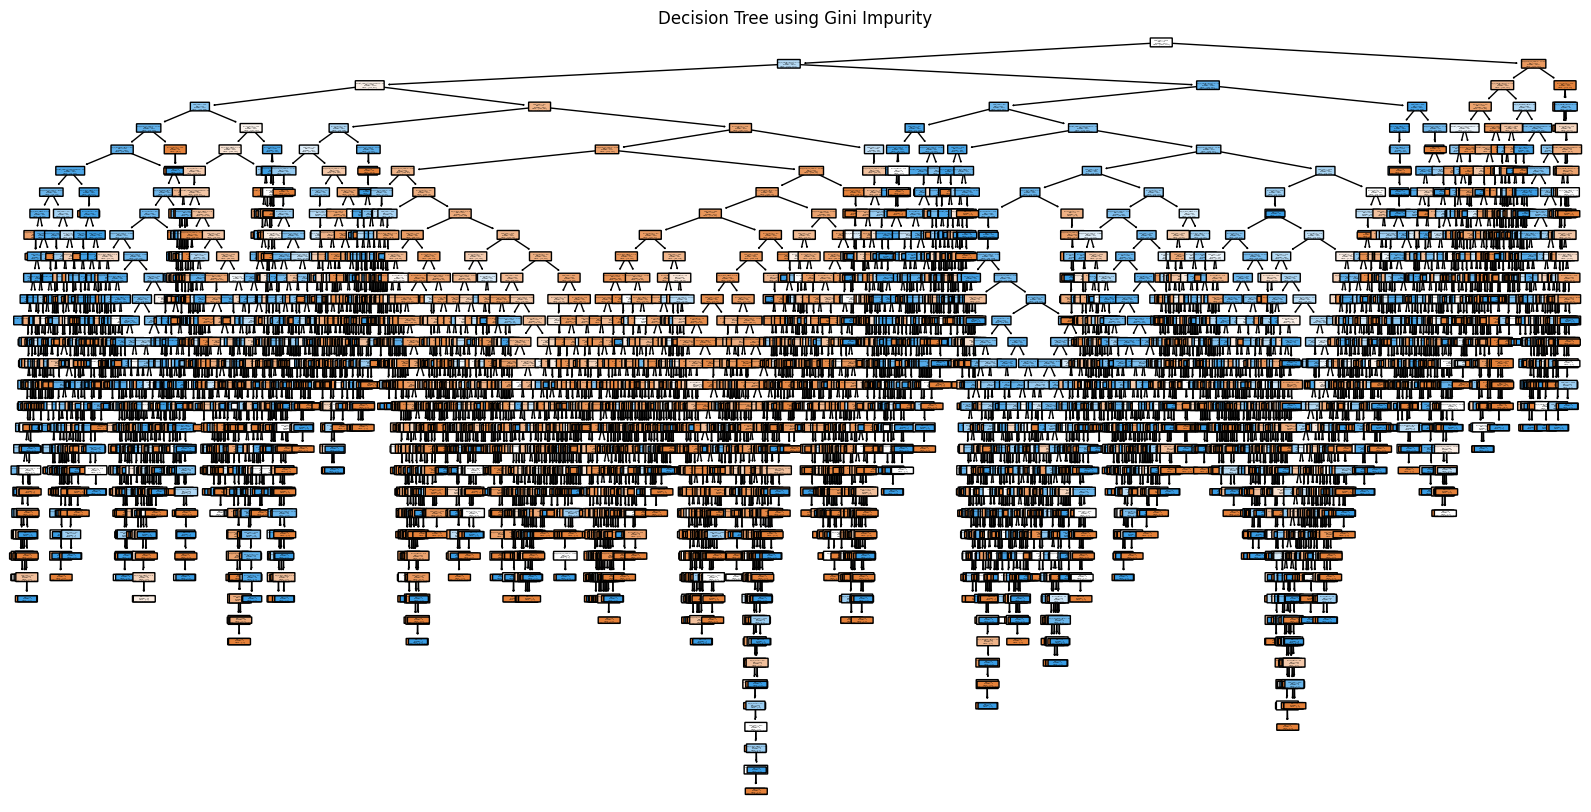

In [72]:
from sklearn.tree import plot_tree

# Visualizing the Decision Tree using Gini impurity
plt.figure(figsize=(20,10))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=['Booking Not Canceled', 'Booking Canceled'], rounded=True)
plt.title("Decision Tree using Gini Impurity")
plt.savefig('Decision_Tree_Gini.pdf')
plt.show()
plt.close()

### Decision Tree Visualization - Entropy

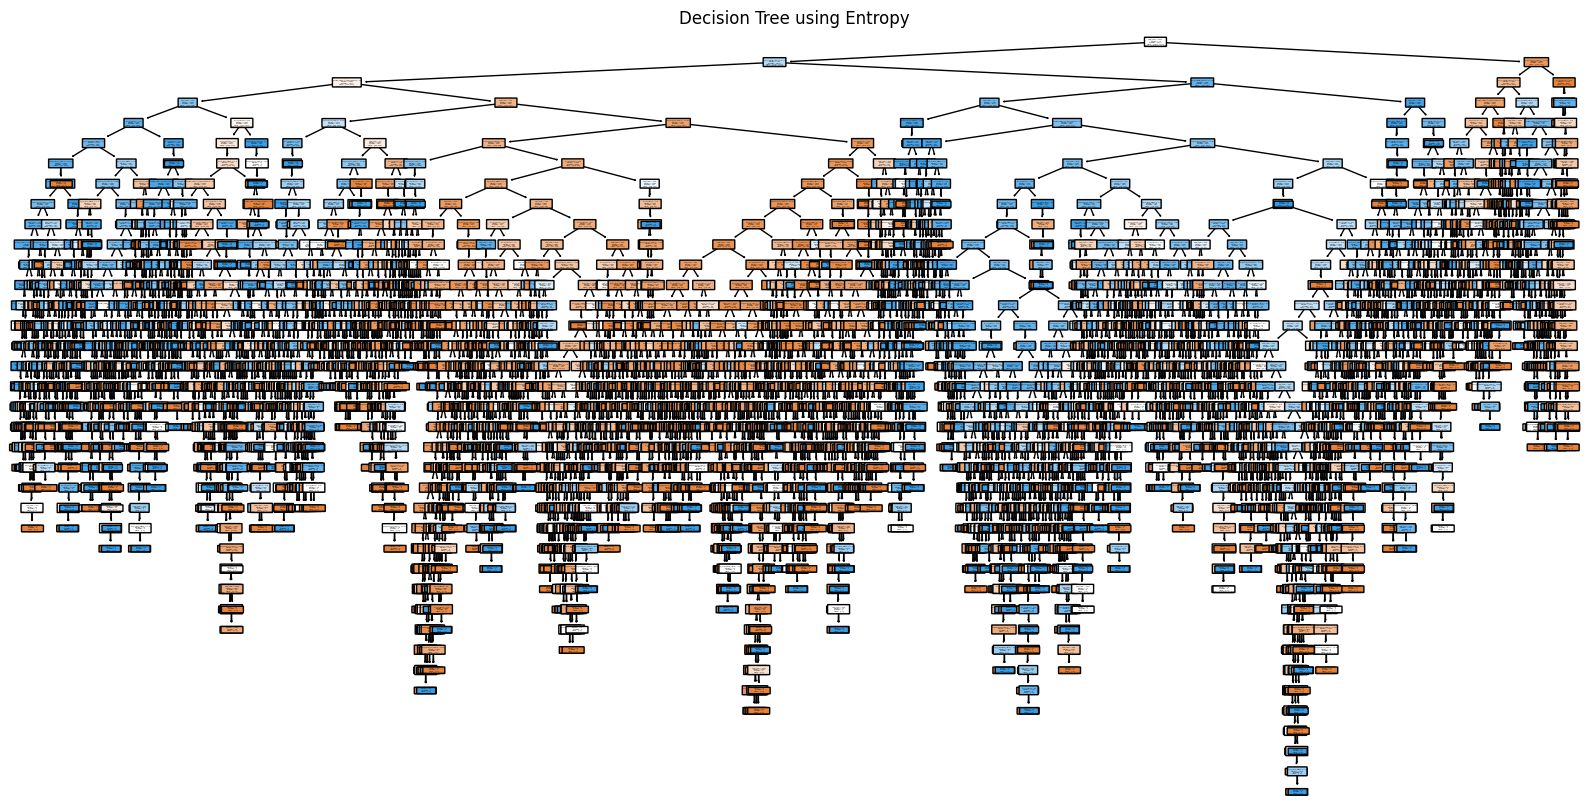

In [73]:
# Visualizing the Decision Tree using Entropy
plt.figure(figsize=(20,10))
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=['Booking Not Canceled', 'Booking Canceled'], rounded=True)
plt.title("Decision Tree using Entropy")
plt.savefig('Decision_Tree_Entropy.pdf')
plt.show()
plt.close()

## **Model Performances Before and After applying SMOTE**
### **KNN**
* Performance of KNN model at optimal K value has not improved after applying SMOTE.
* The performance has reduced for both Euclidean distance and Manhattan distance.
### **Decision Tree**
* Performance of Decision Tree model has improved after applying SMOTE.
* The performance of model using Gini impurity has improved.
* The performance of model using Entropy is approximately similar to the one before SMOTE.  

# **Save the Best Model**
## Decision Tree with Gini Impurity using SMOTE

In [74]:
# save the model
import pickle
pickle.dump(model_gini, open('model_booking_prediction_decision_tree_gini.pkl', 'wb'))

## Load the Saved Model and Predict Booking Status

In [75]:
# load the model
import pickle
booking_prediction_model = pickle.load(open('model_booking_prediction_decision_tree_gini.pkl', 'rb')) # read binaries

### Run the model with dummy values

In [76]:
# Dummy values
lead_time = 300
avg_price_per_room = 50
market_segment_type = 3
no_of_special_requests = 0
arrival_date = 30
arrival_month = 10
no_of_week_nights = 2
no_of_weekend_nights = 1
no_of_adults = 3

# run the model with dummy values
# predict booking status using the model
features_for_prediction = [[lead_time, avg_price_per_room, market_segment_type, no_of_special_requests, arrival_date, arrival_month, no_of_week_nights, no_of_weekend_nights, no_of_adults]]
booking_status_predicted = booking_prediction_model.predict(features_for_prediction)

print("Input: Features:", features_for_prediction)
print("Output: Predicted Booking Status", booking_status_predicted)
if booking_status_predicted == 1:
    print("Booking will be canceled.")
else:
    print("Booking will not be canceled.")

Input: Features: [[300, 50, 3, 0, 30, 10, 2, 1, 3]]
Output: Predicted Booking Status [0]
Booking will not be canceled.


### Run the model with input from the user

In [80]:
# get features as input from the user
lead_time = int(input("Enter lead time:"))
avg_price_per_room = int(input("Enter avg price per room:"))
market_segment_type = int(input("Enter market segment type:"))
no_of_special_requests = int(input("Enter number of special requests:"))
arrival_date = int(input("Enter arrival date:"))
arrival_month = int(input("Enter arrival month:"))
no_of_week_nights = int(input("Enter number of week nights:"))
no_of_weekend_nights = int(input("Enter number of weekend nights:"))
no_of_adults = int(input("Enter number of adults:"))

print("USER INPUT")
print("------------------------------------------------------")
print("lead_time =", lead_time)
print("avg_price_per_room =", avg_price_per_room)
print("market_segment_type =", market_segment_type)
print("no_of_special_requests =", no_of_special_requests)
print("arrival_date =", arrival_date)
print("arrival_month =", arrival_month)
print("no_of_week_nights =", no_of_week_nights)
print("no_of_weekend_nights =", no_of_weekend_nights)
print("no_of_adults =", no_of_adults)

# Run the model with user input
# predict booking status using the model
features_for_prediction = [[lead_time, avg_price_per_room, market_segment_type, no_of_special_requests, arrival_date, arrival_month, no_of_week_nights, no_of_weekend_nights, no_of_adults]]
booking_status_predicted = booking_prediction_model.predict(features_for_prediction)

print()
print("Input: Features:", features_for_prediction)
print("Output: Predicted Booking Status", booking_status_predicted)
if booking_status_predicted == 1:
    print("Booking will be canceled.")
else:
    print("Booking will not be canceled.")

USER INPUT
------------------------------------------------------
lead_time = 52
avg_price_per_room = 12
market_segment_type = 3
no_of_special_requests = 2
arrival_date = 12
arrival_month = 1
no_of_week_nights = 2
no_of_weekend_nights = 1
no_of_adults = 4

Input: Features: [[52, 12, 3, 2, 12, 1, 2, 1, 4]]
Output: Predicted Booking Status [1]
Booking will be canceled.
